In [3]:
import pandas as pd
import os
import opensoundscape
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt


In [24]:
CC_2004_07 = pd.read_csv('Capstone/modified_annotations/MasterSheet_modification.csv')

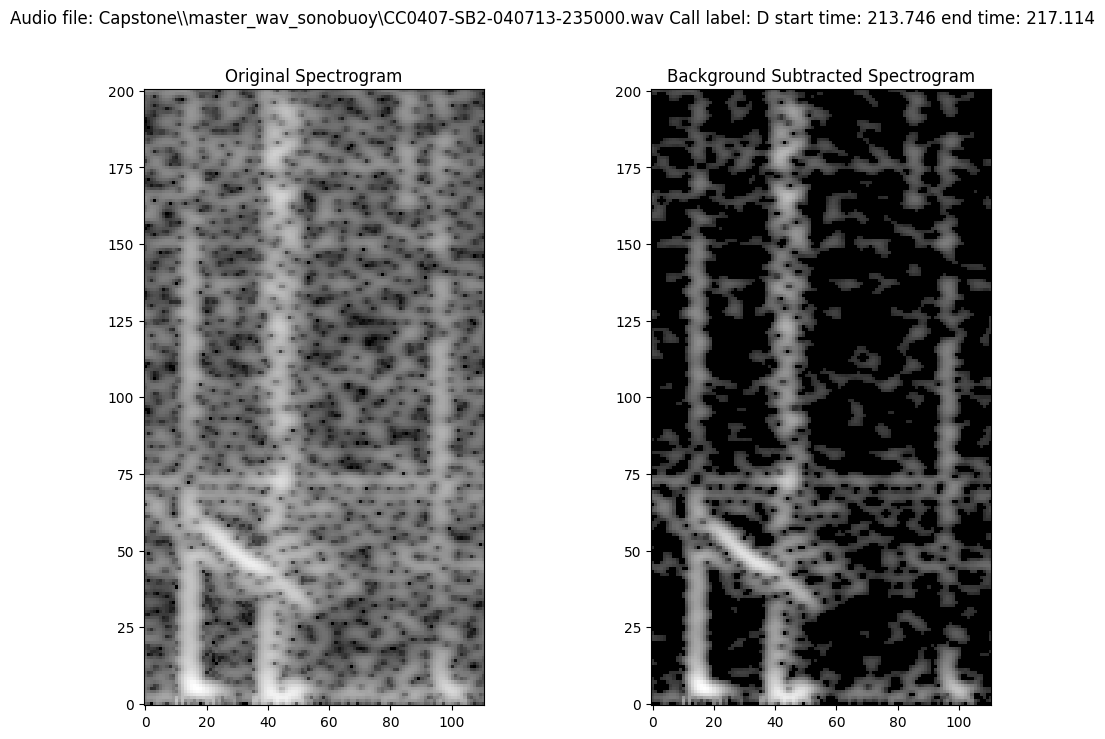

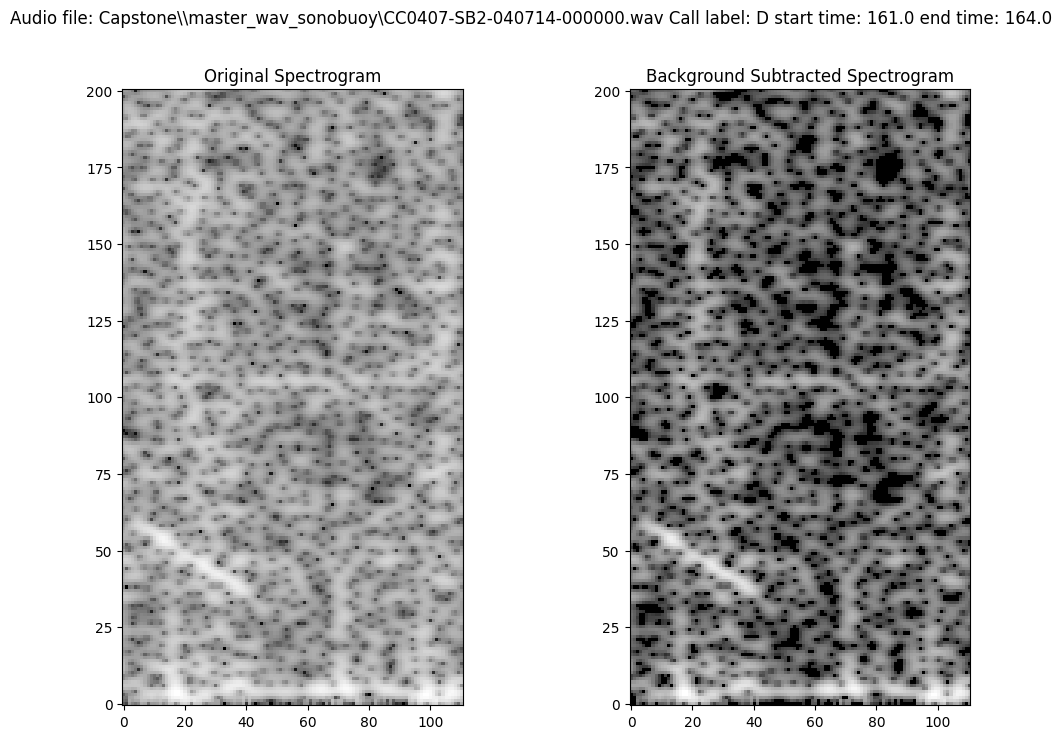

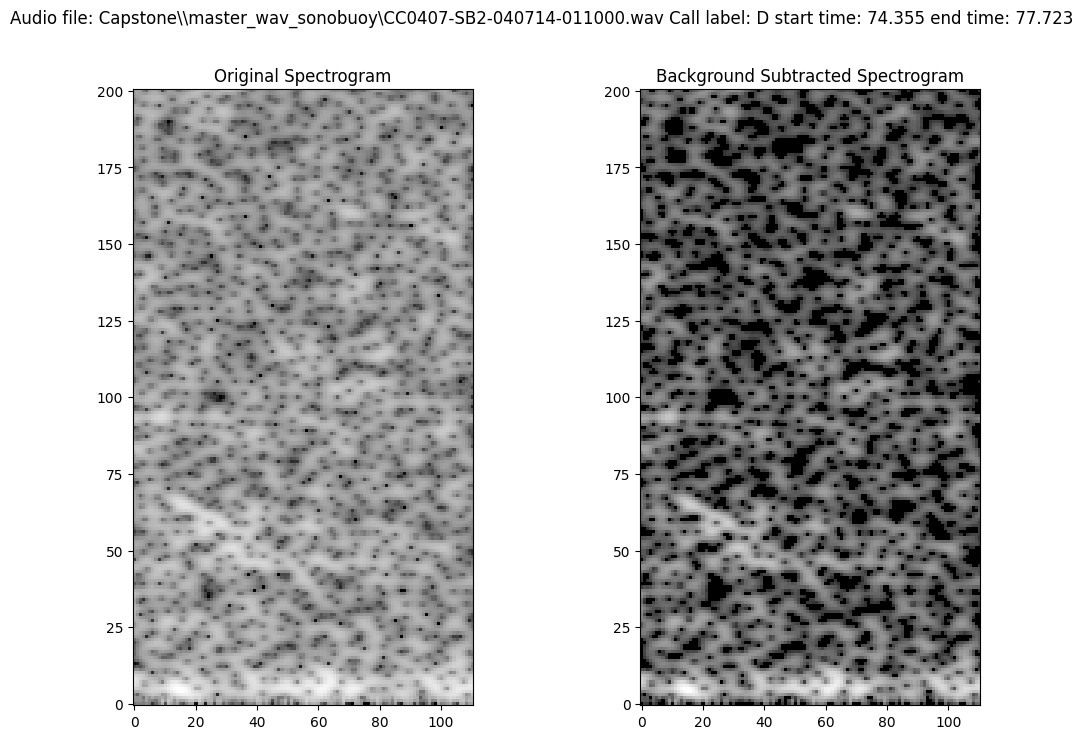

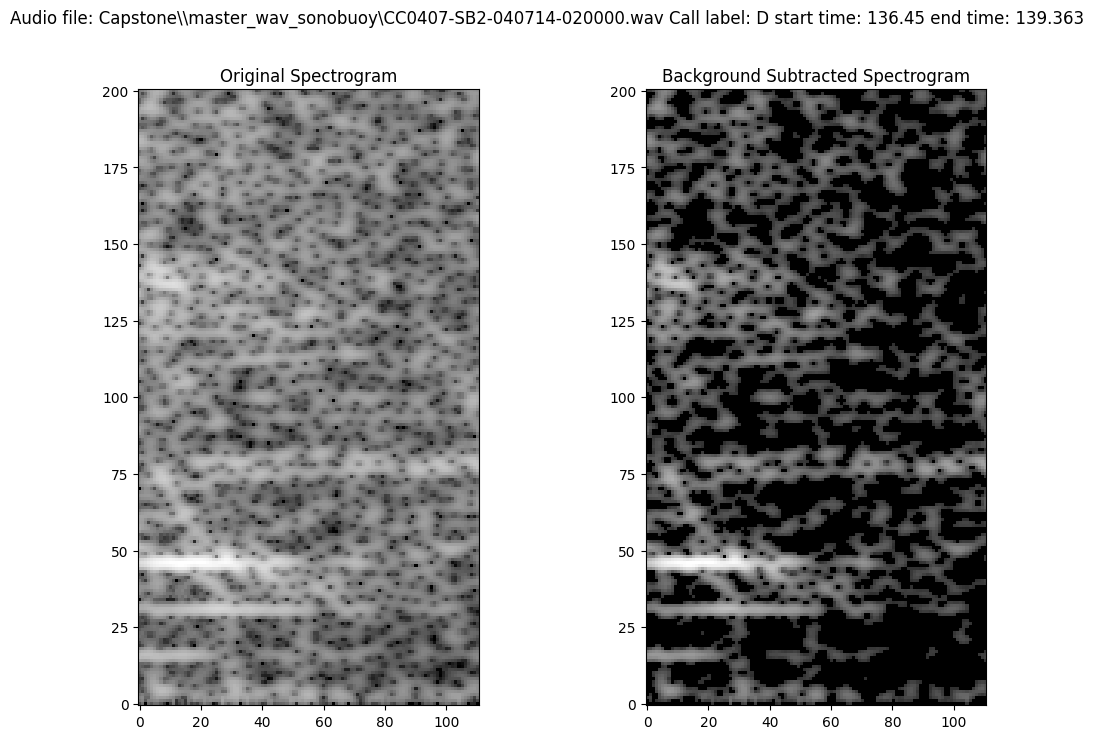

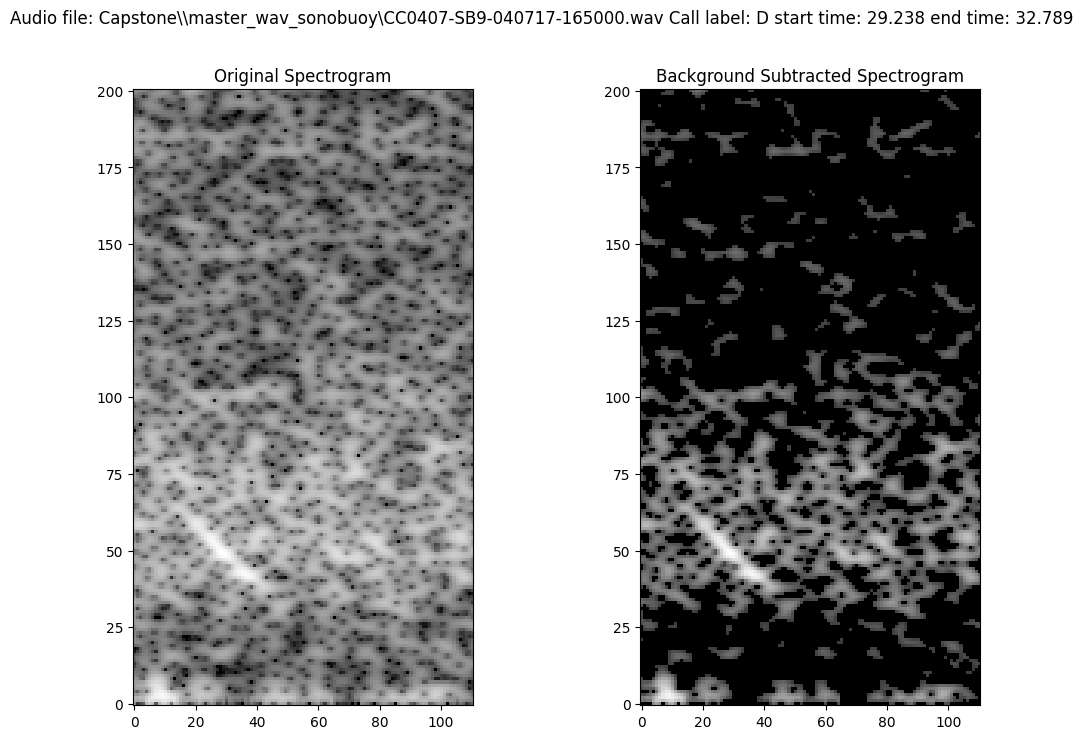

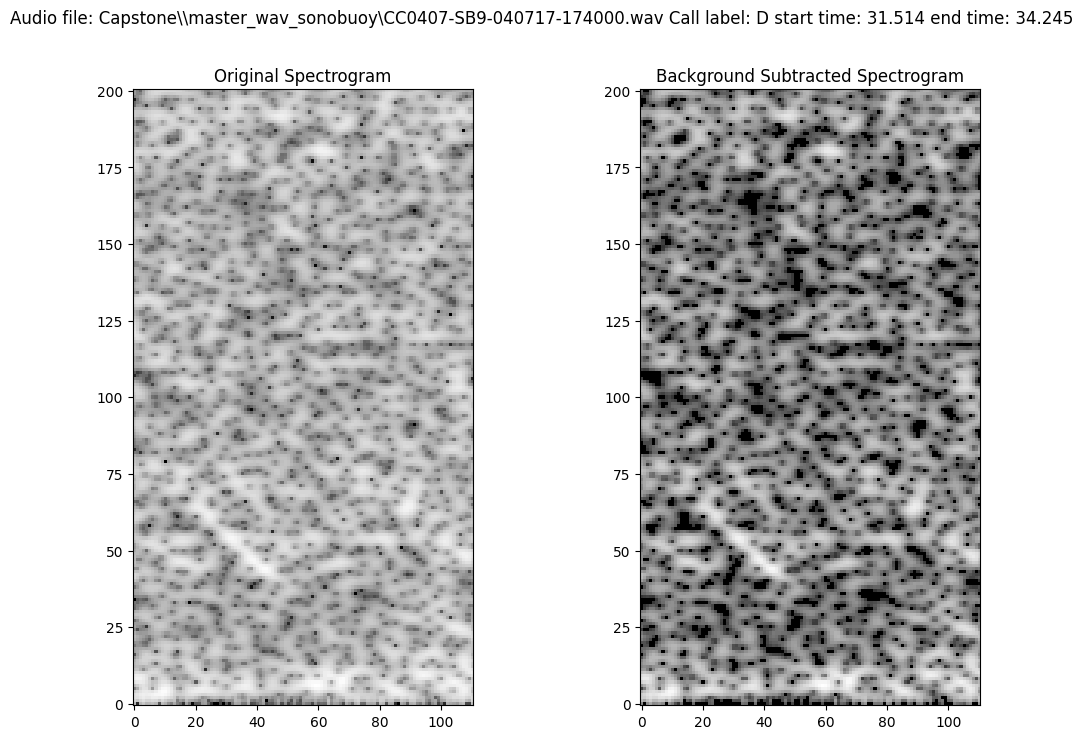

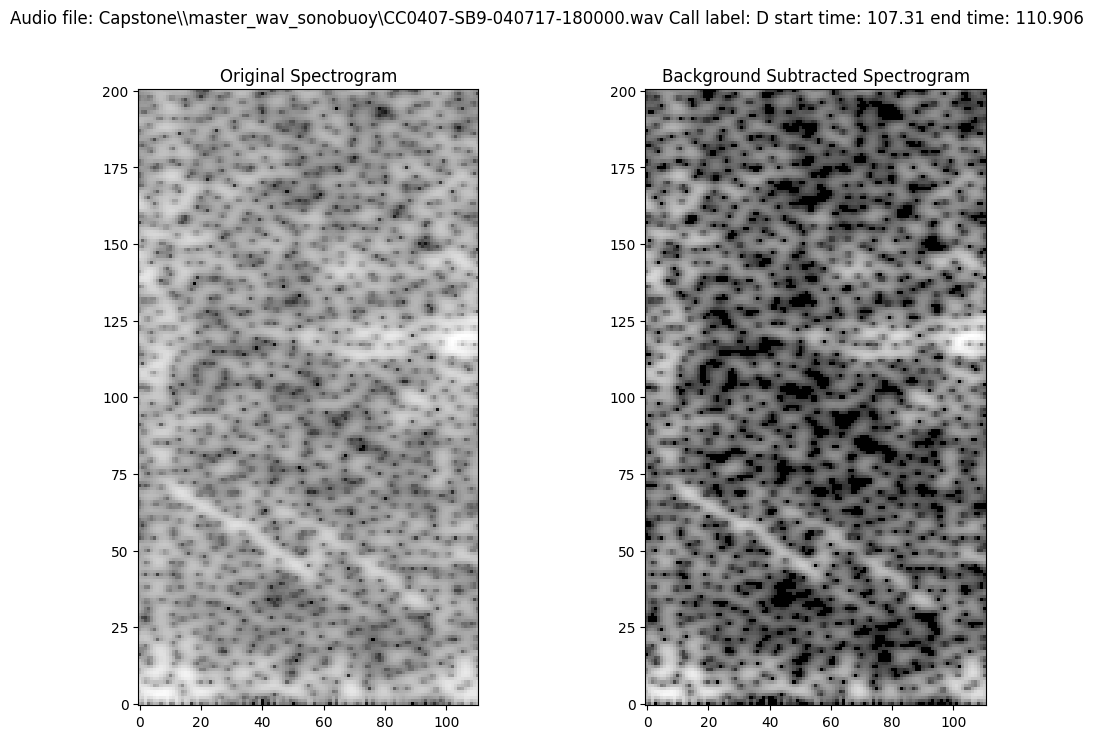

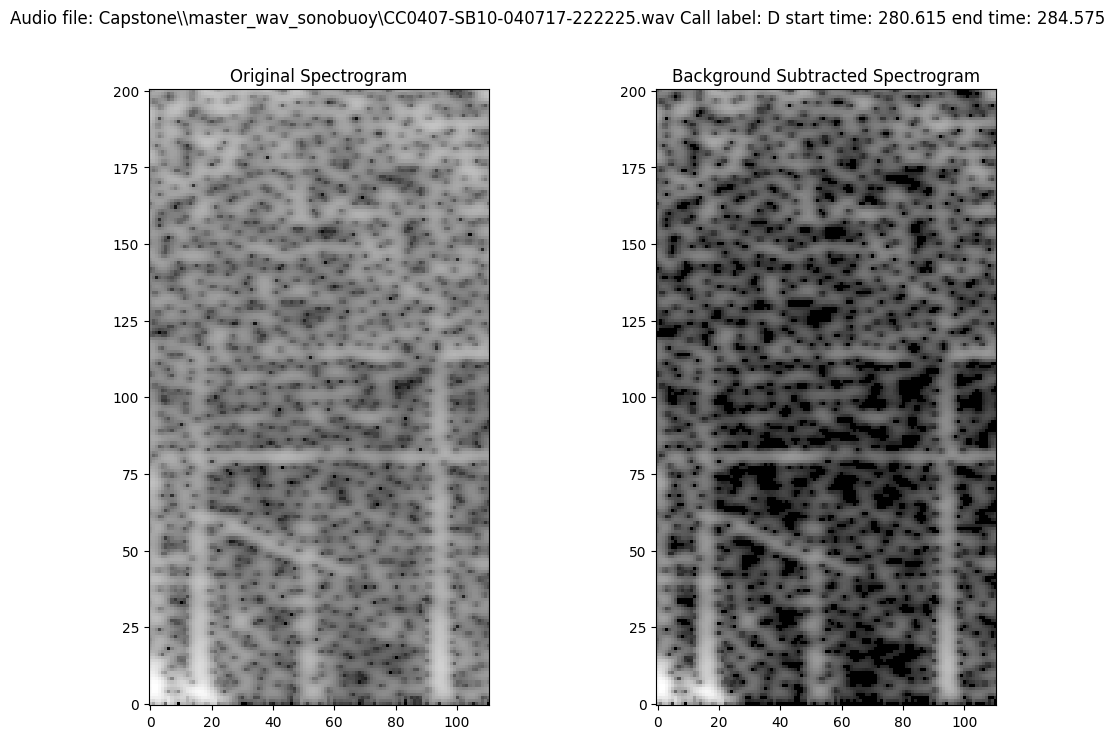

c:\Users\yoobi\AppData\Local\Programs\Python\Python310\lib\site-packages\opensoundscape\audio.py:328: UserWarning: audio object has zero samples
  warnings.warn(error_msg)


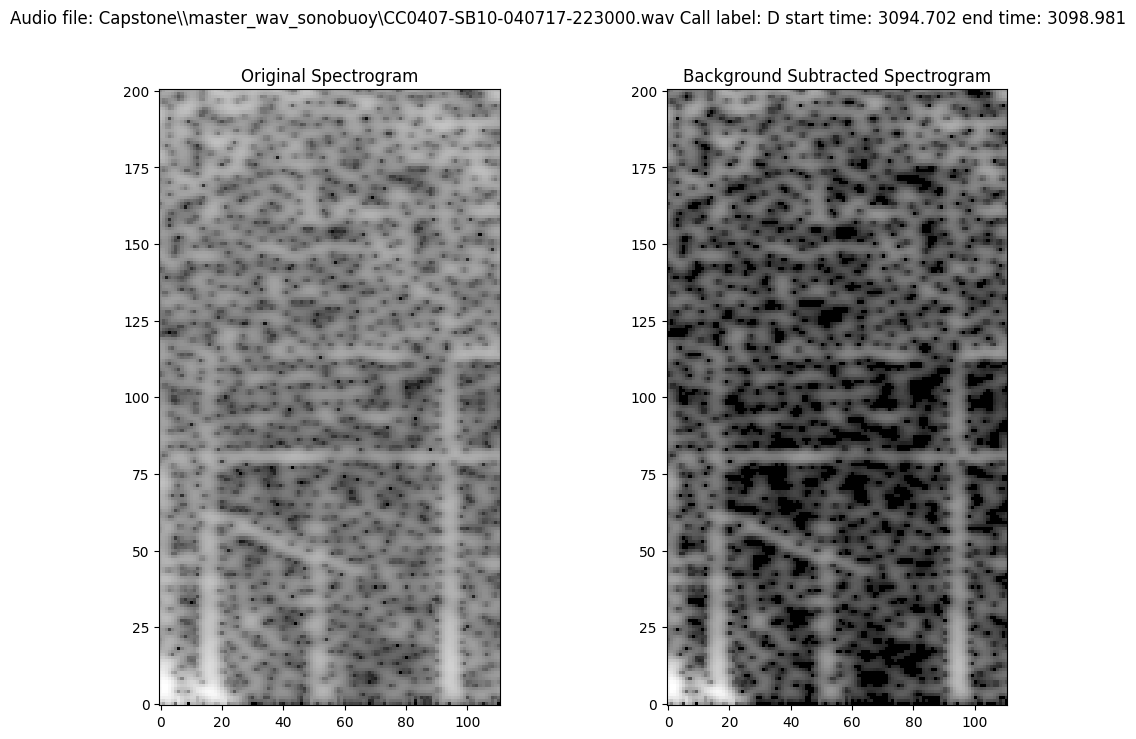

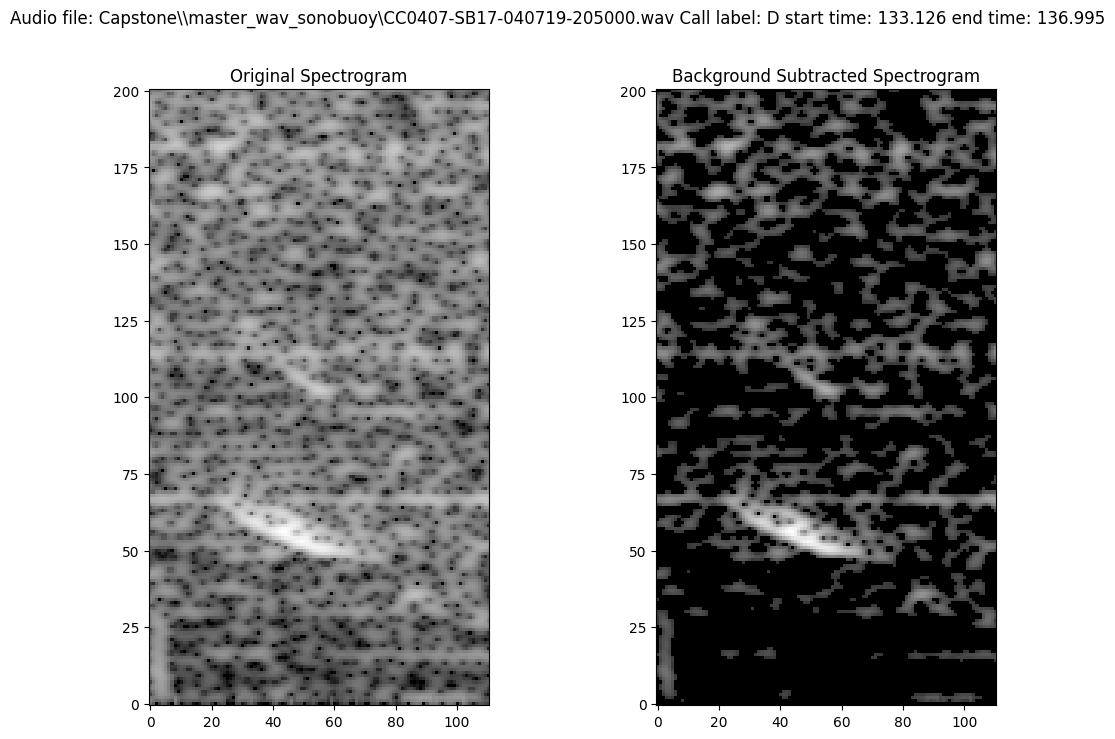

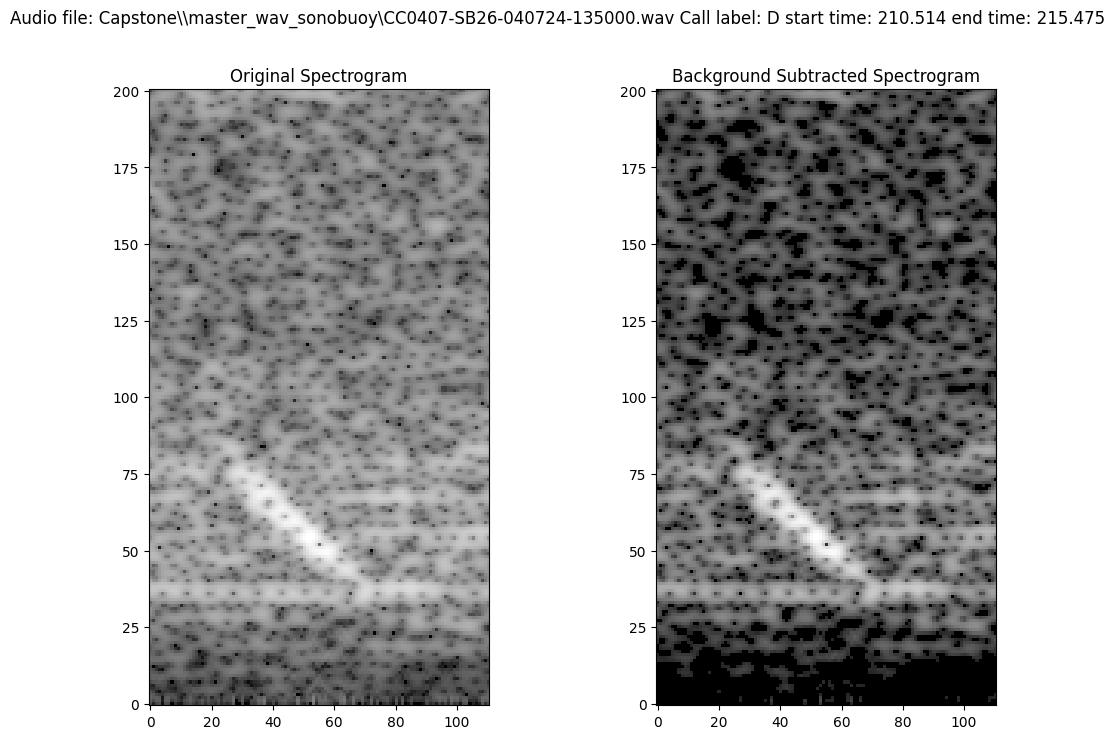

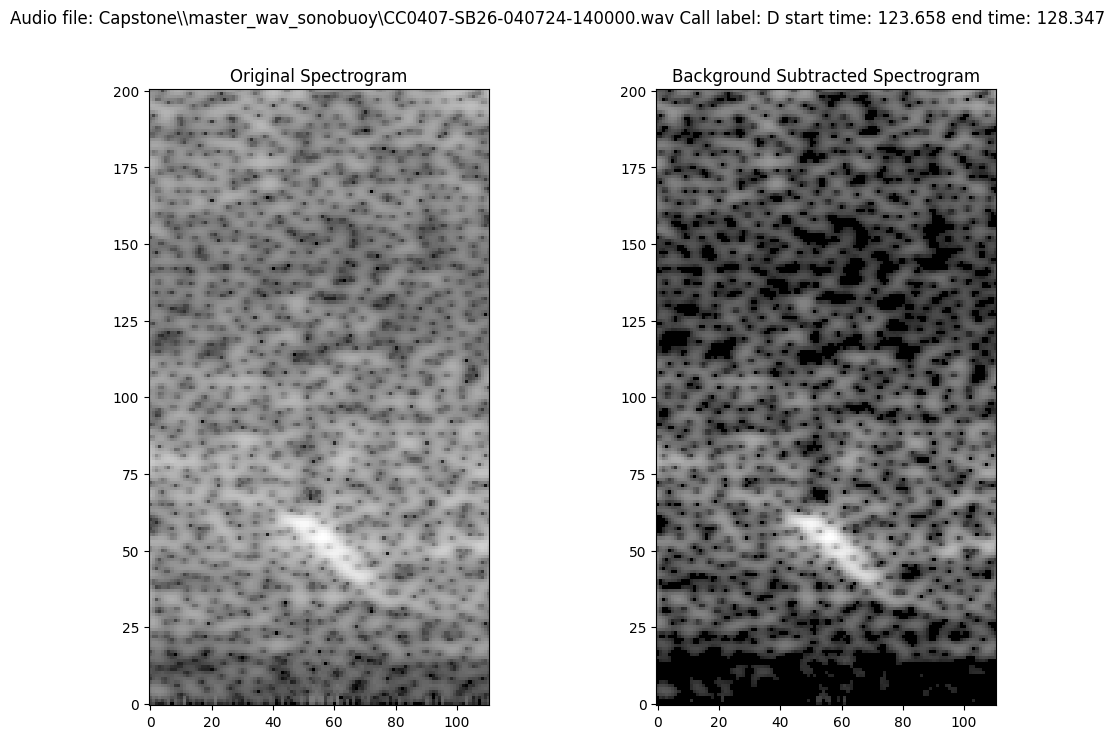

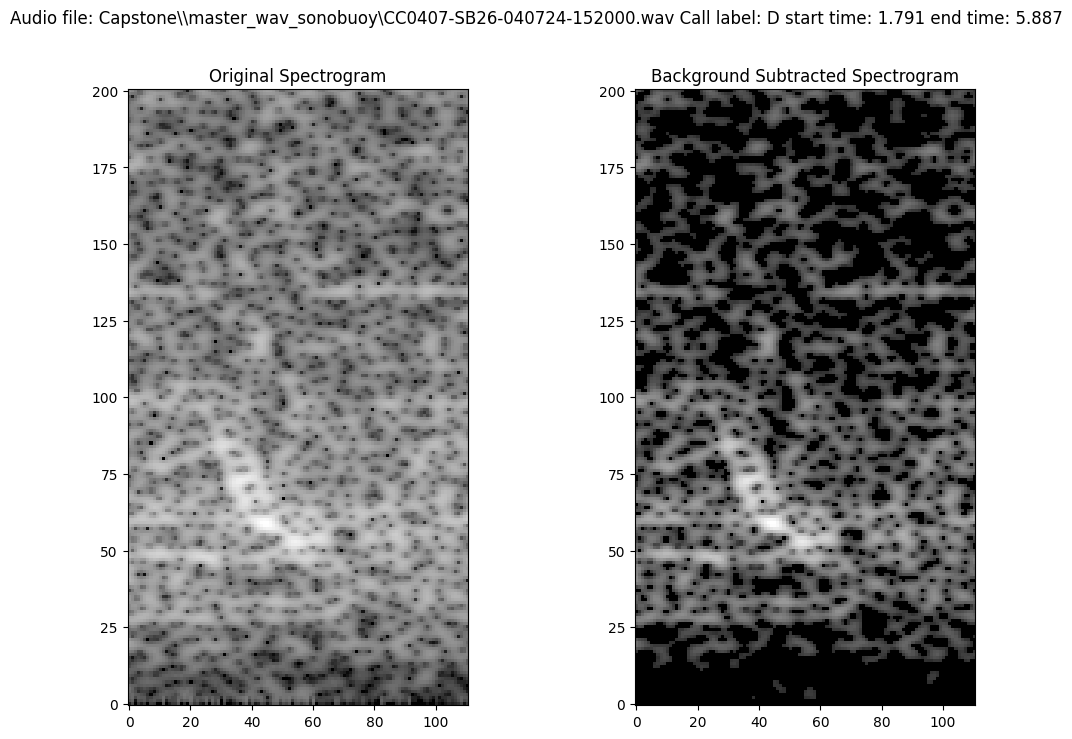

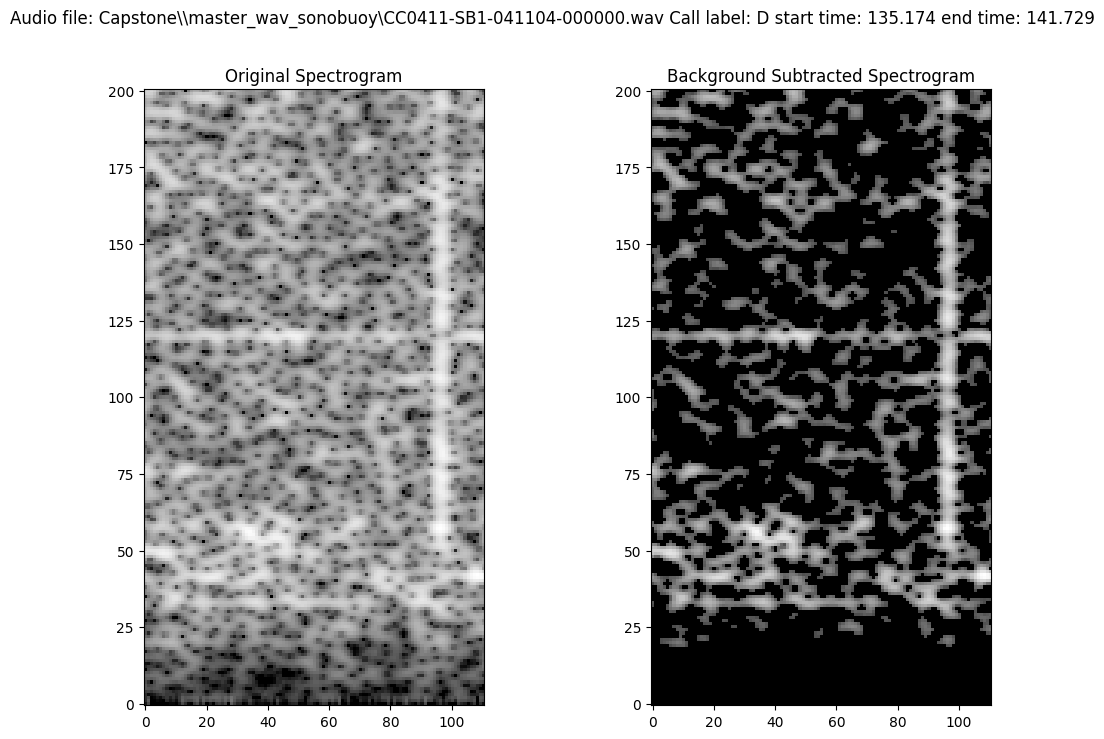

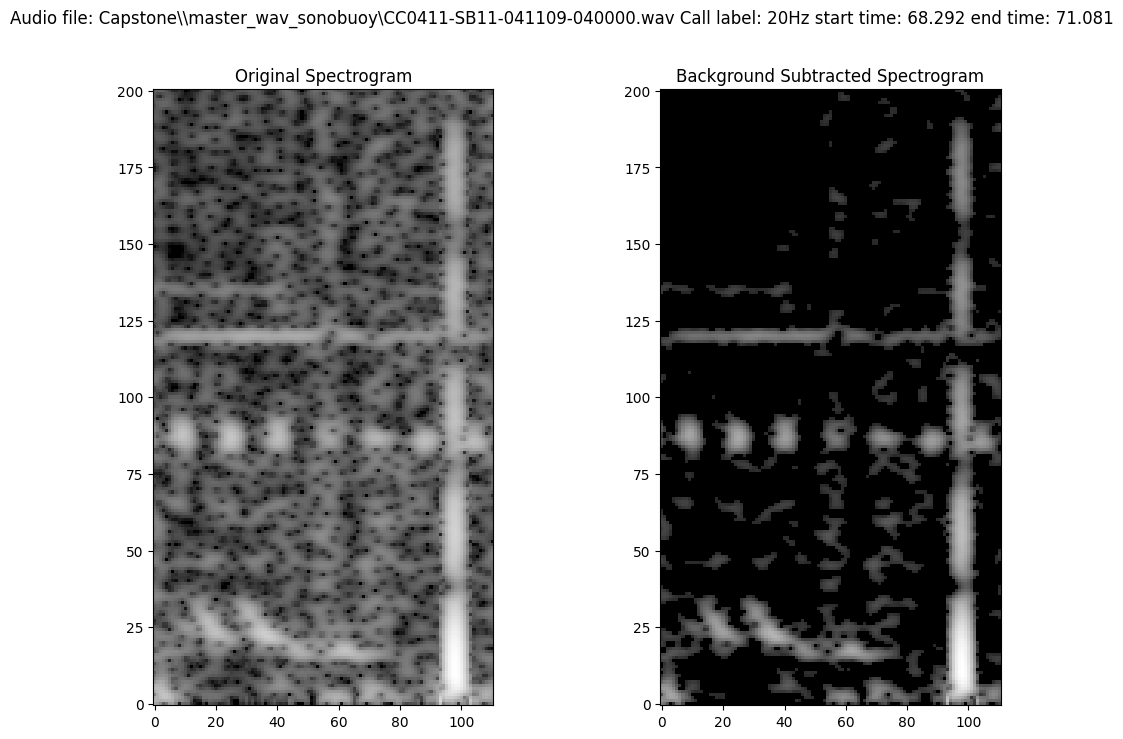

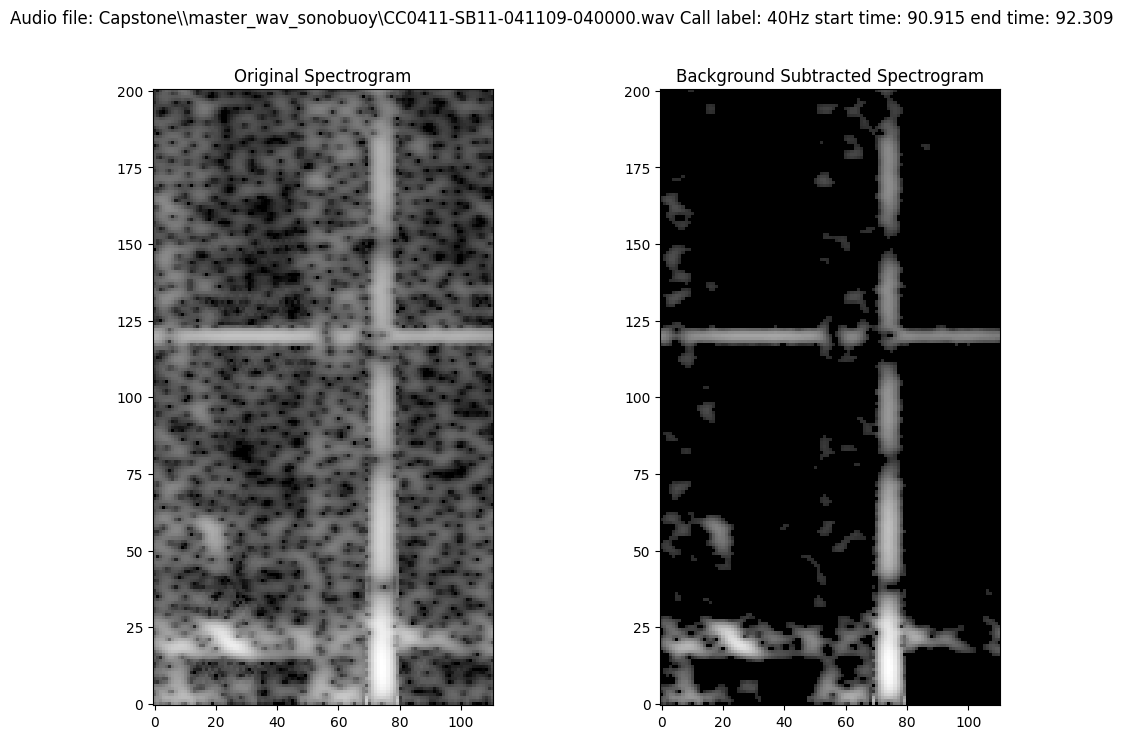

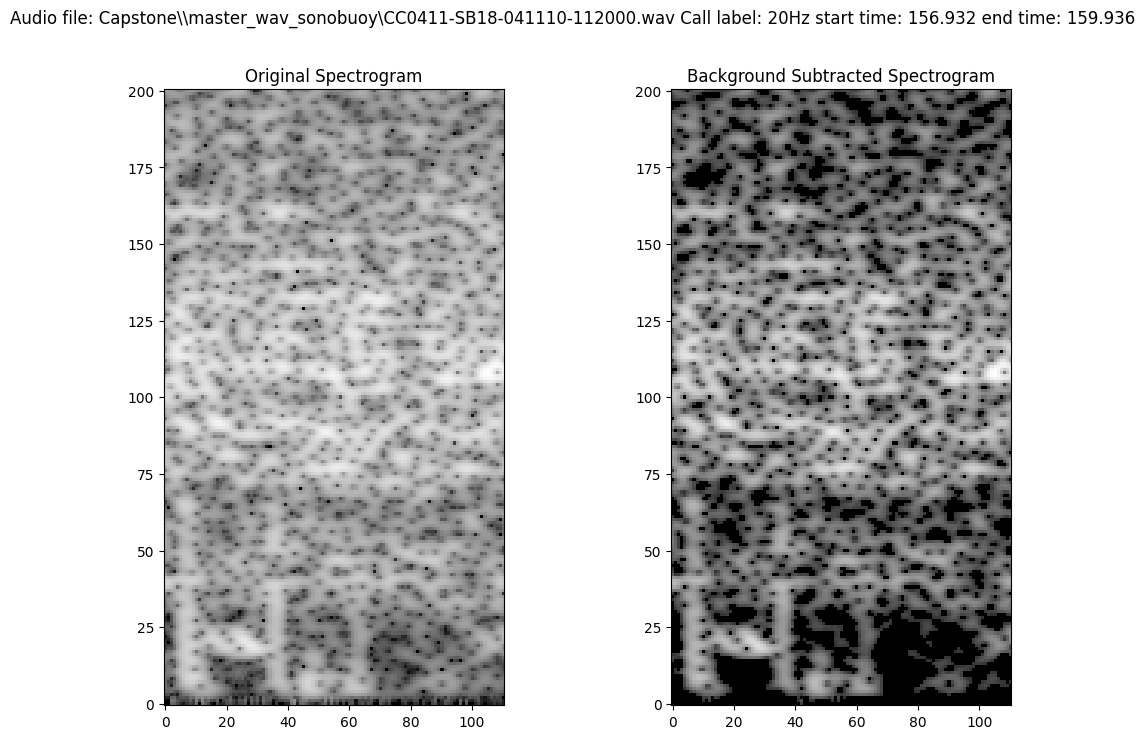

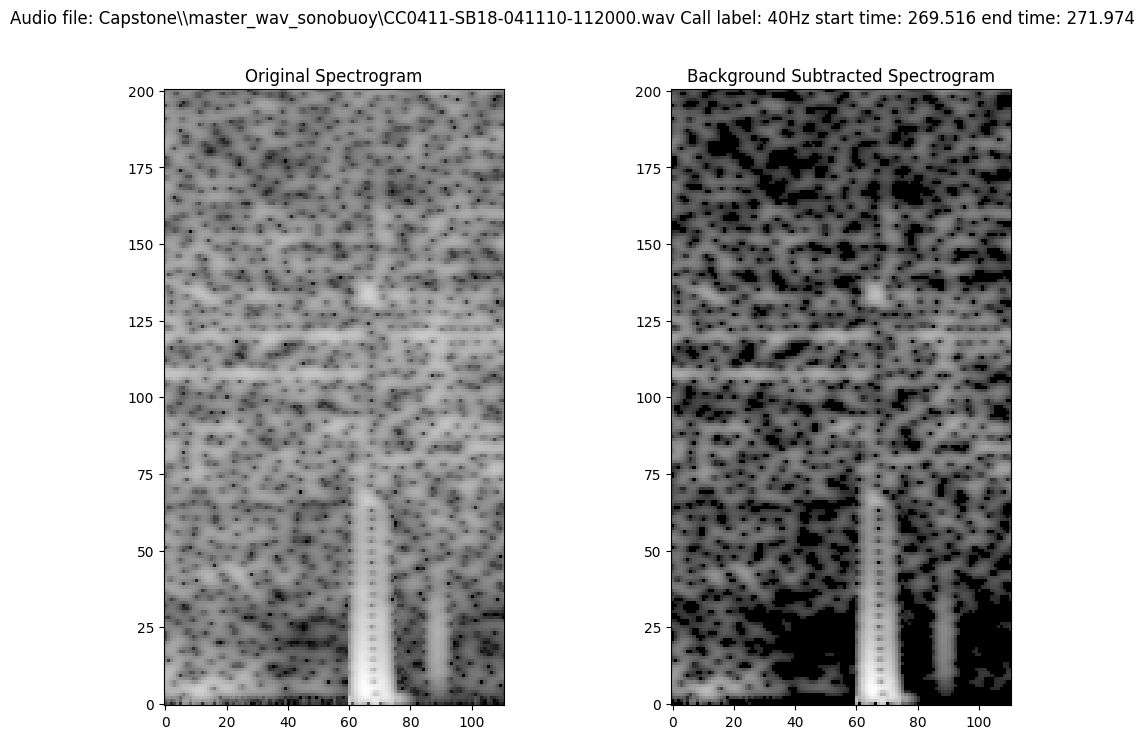

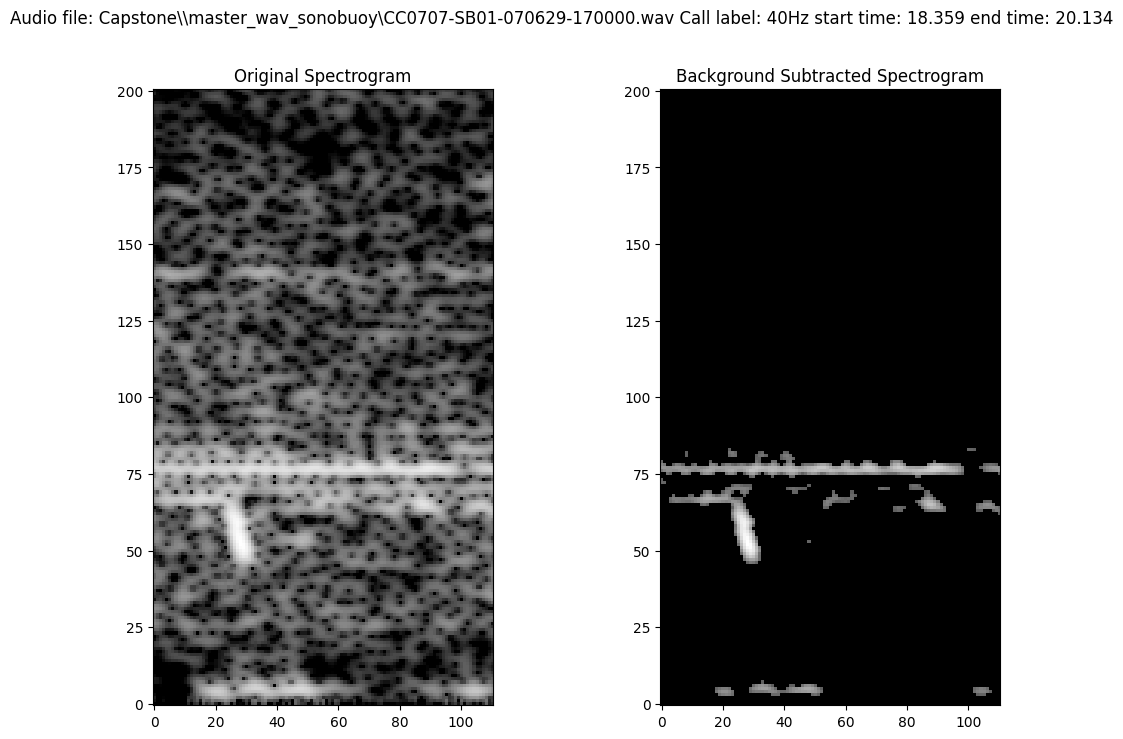

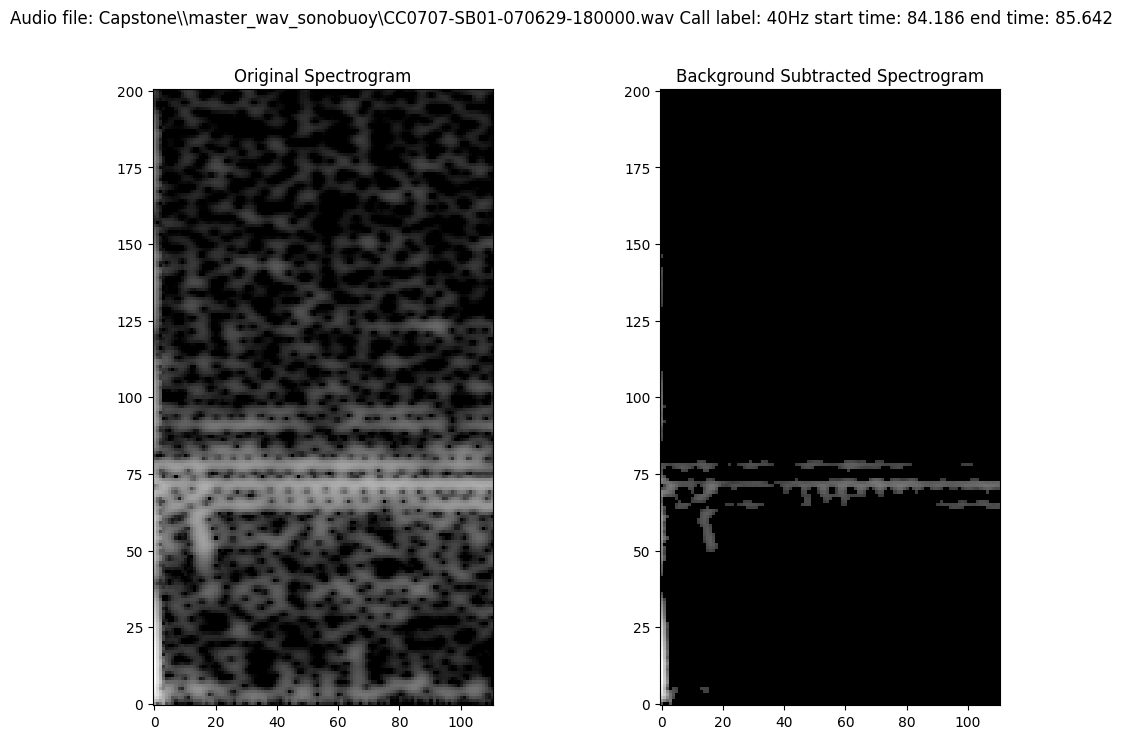

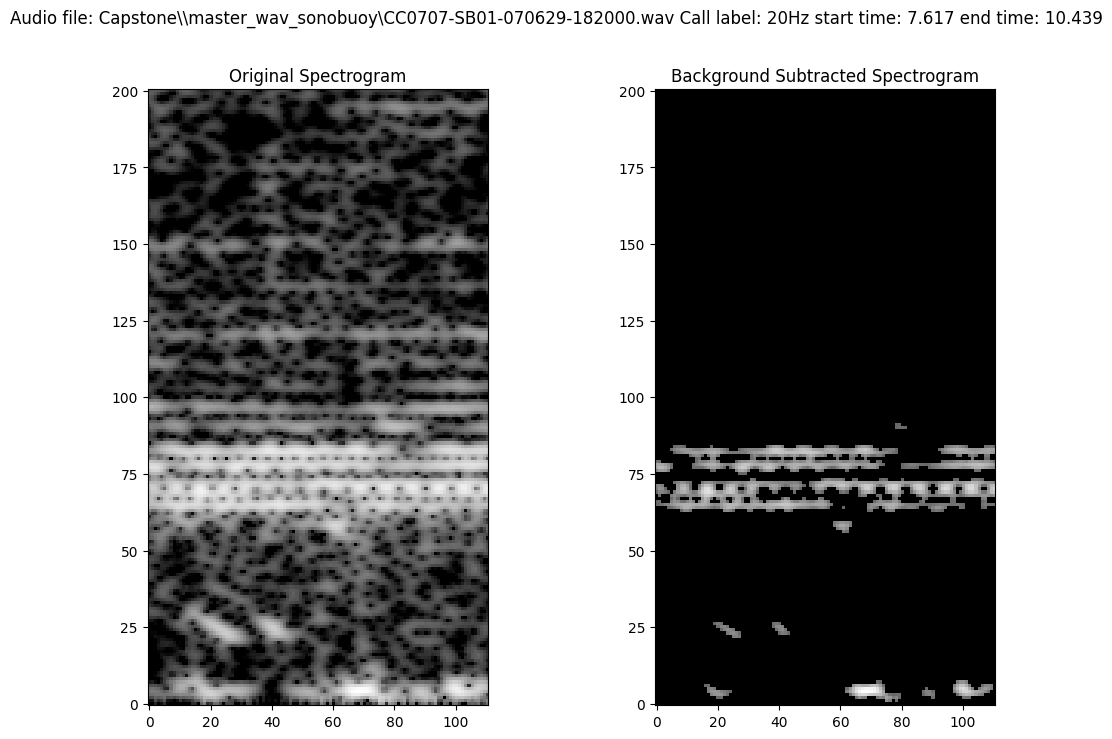

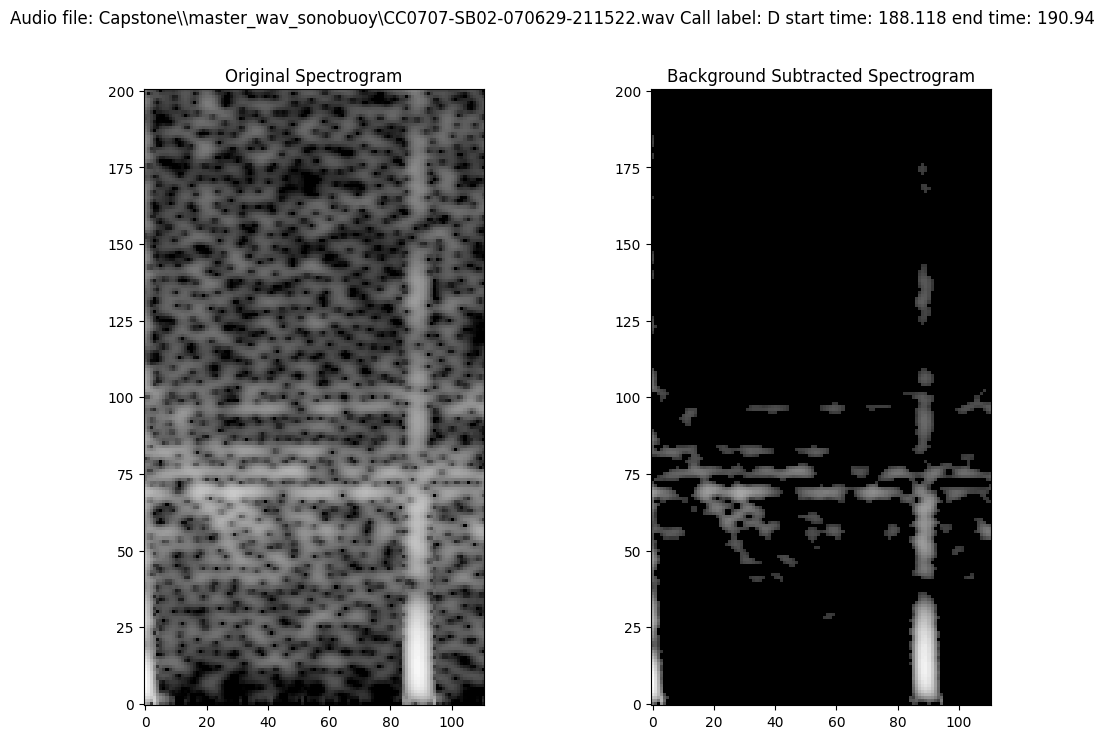

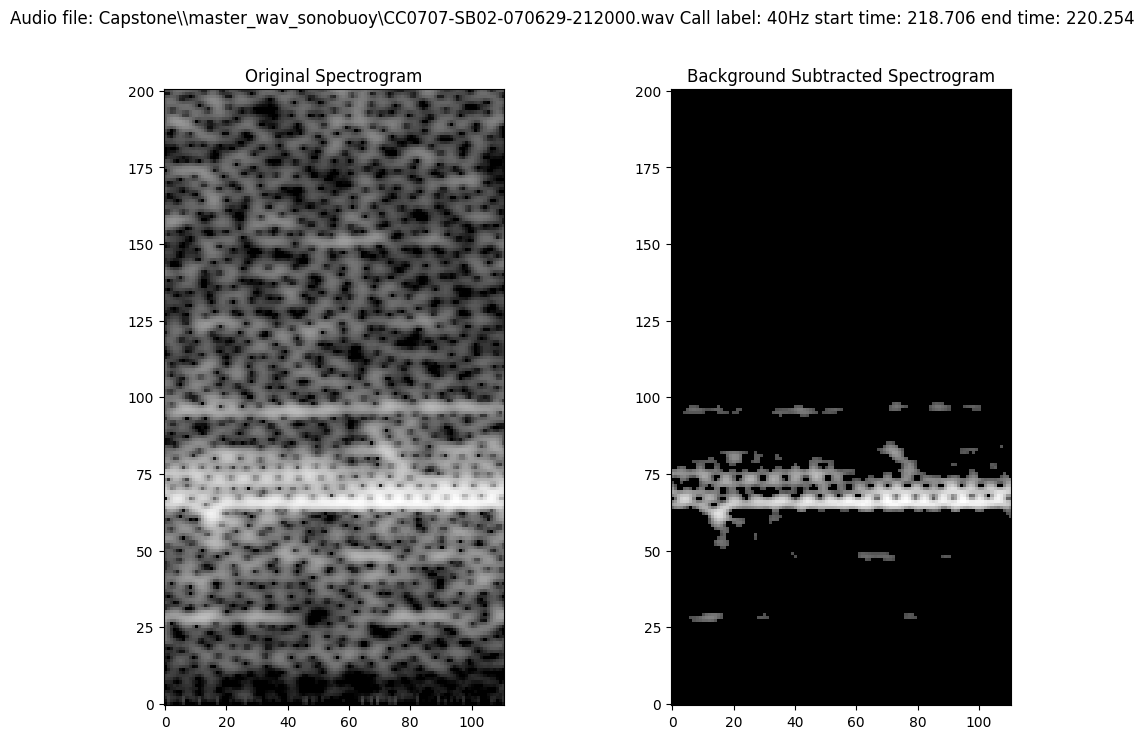

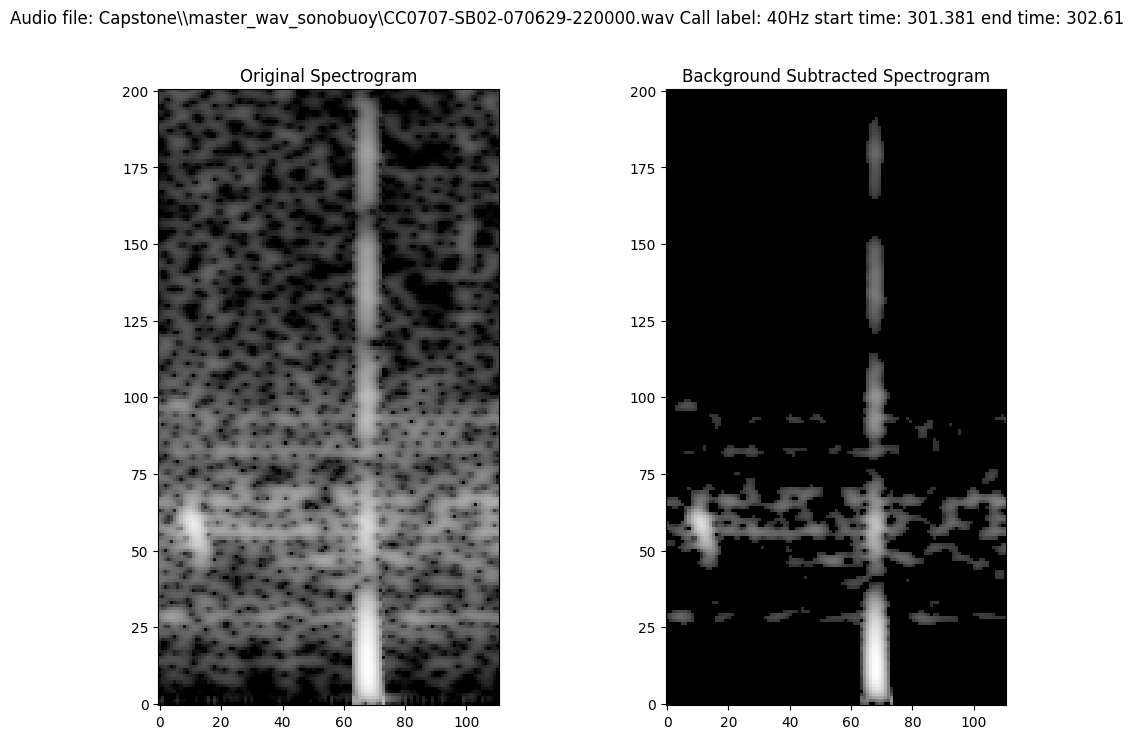

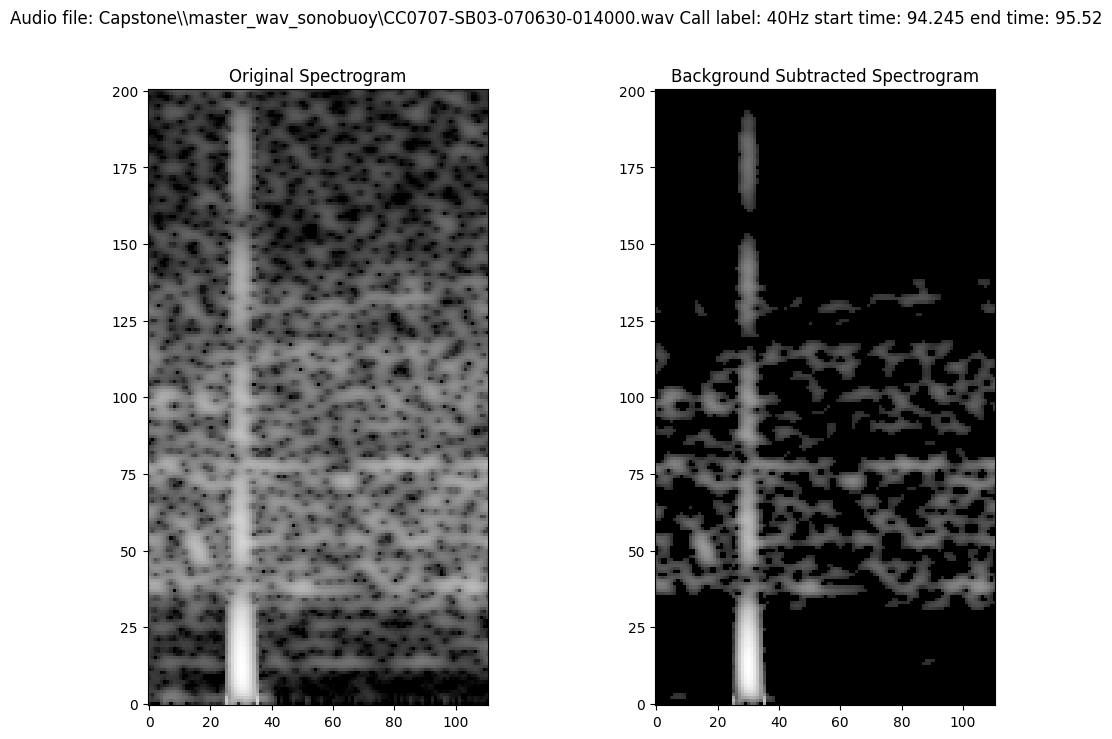

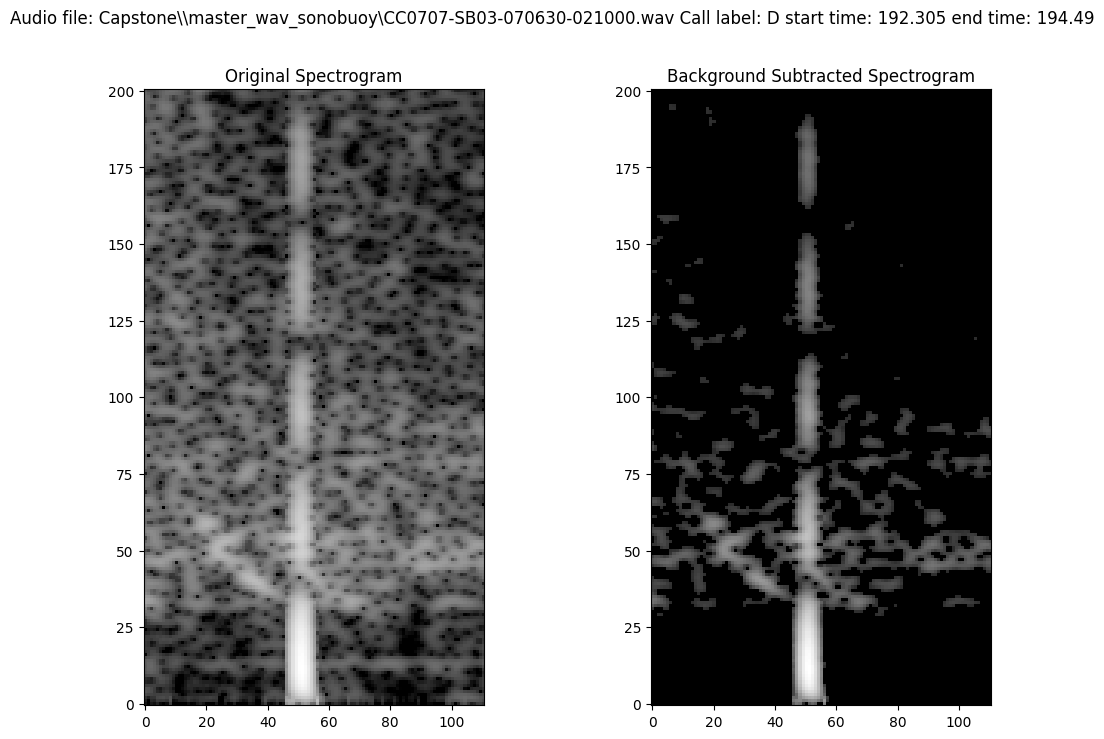

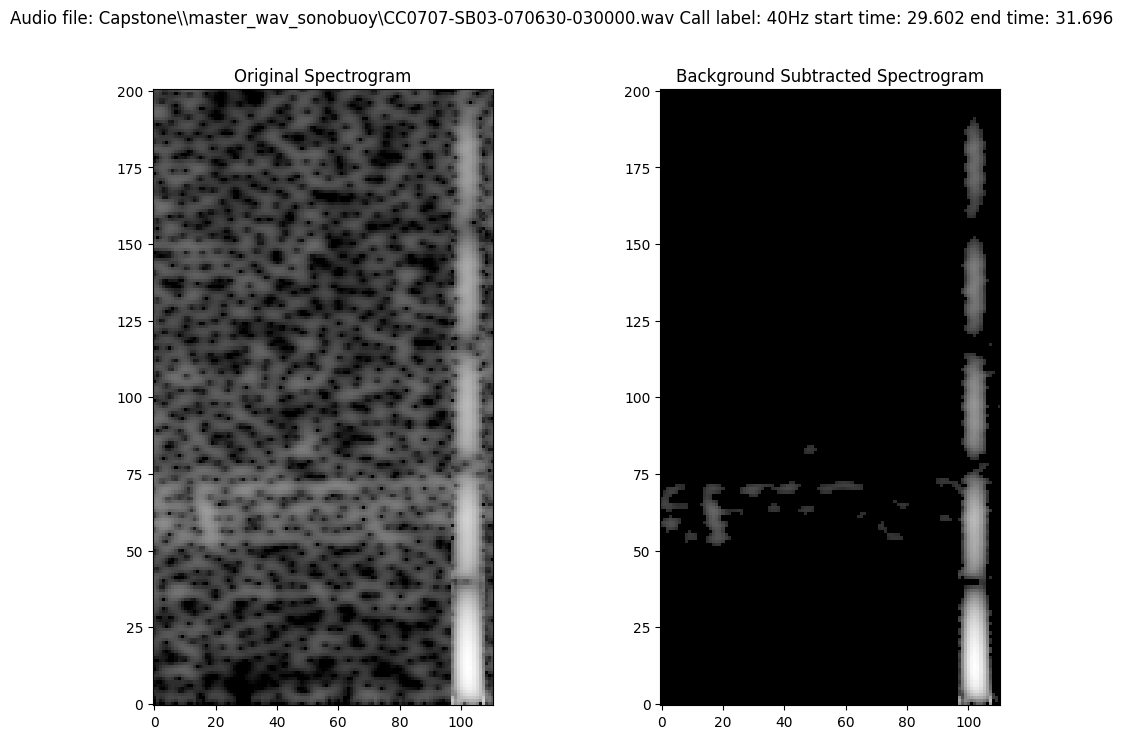

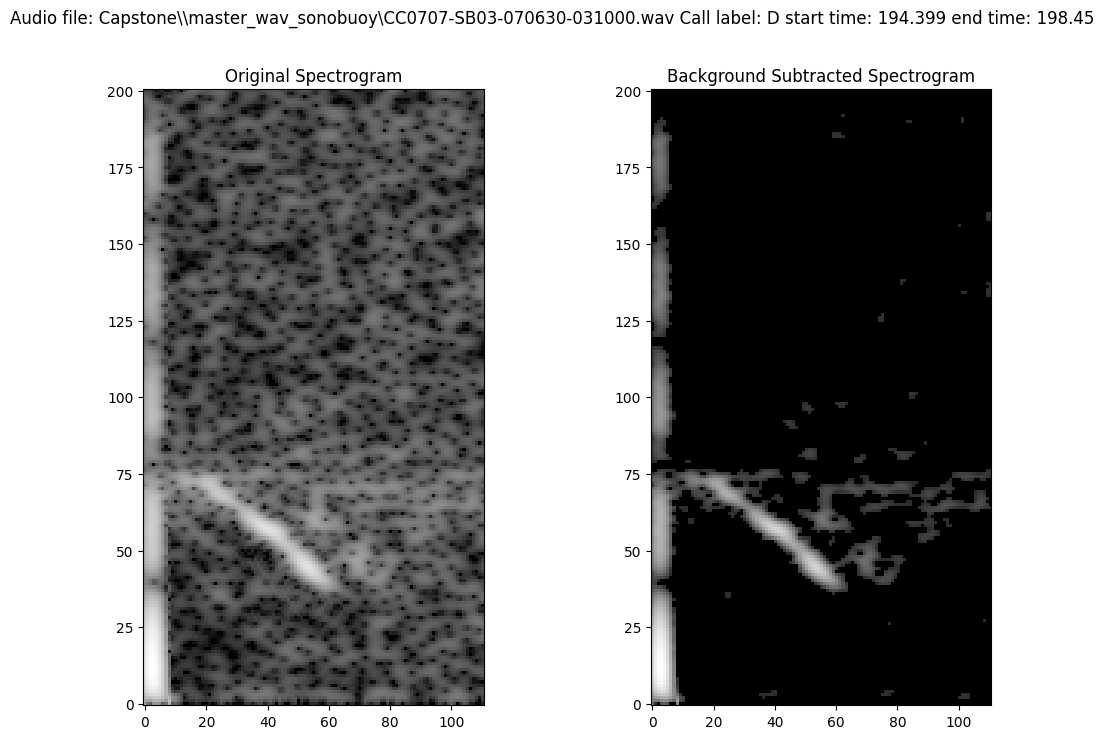

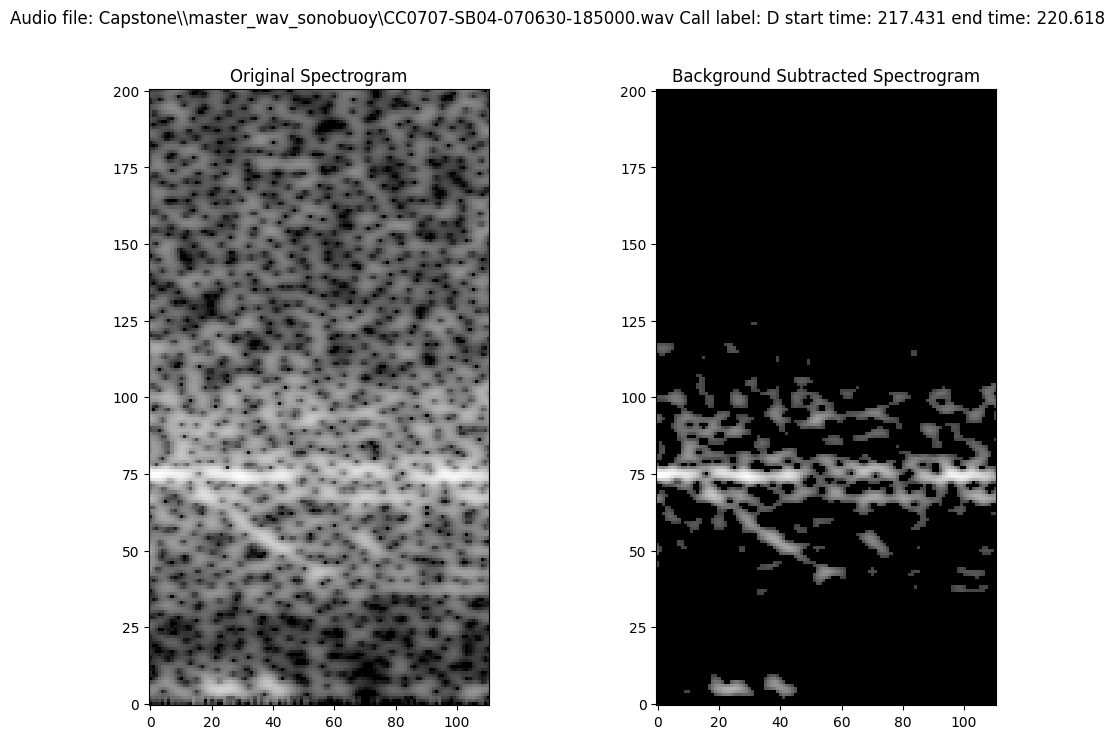

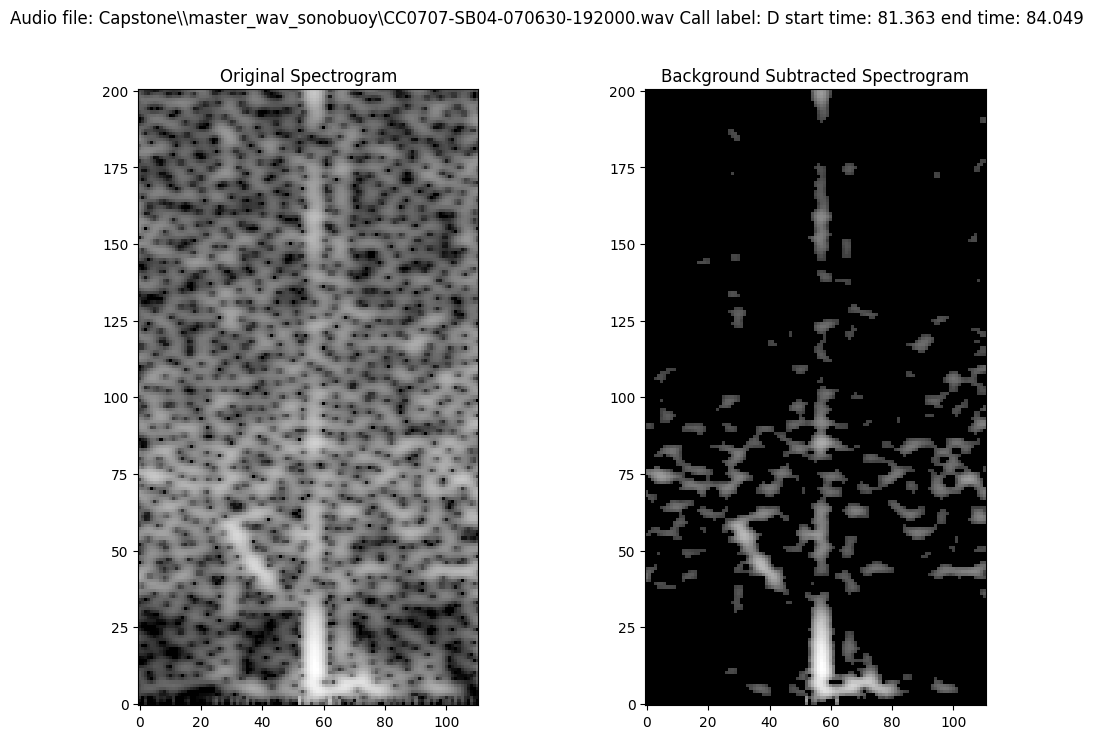

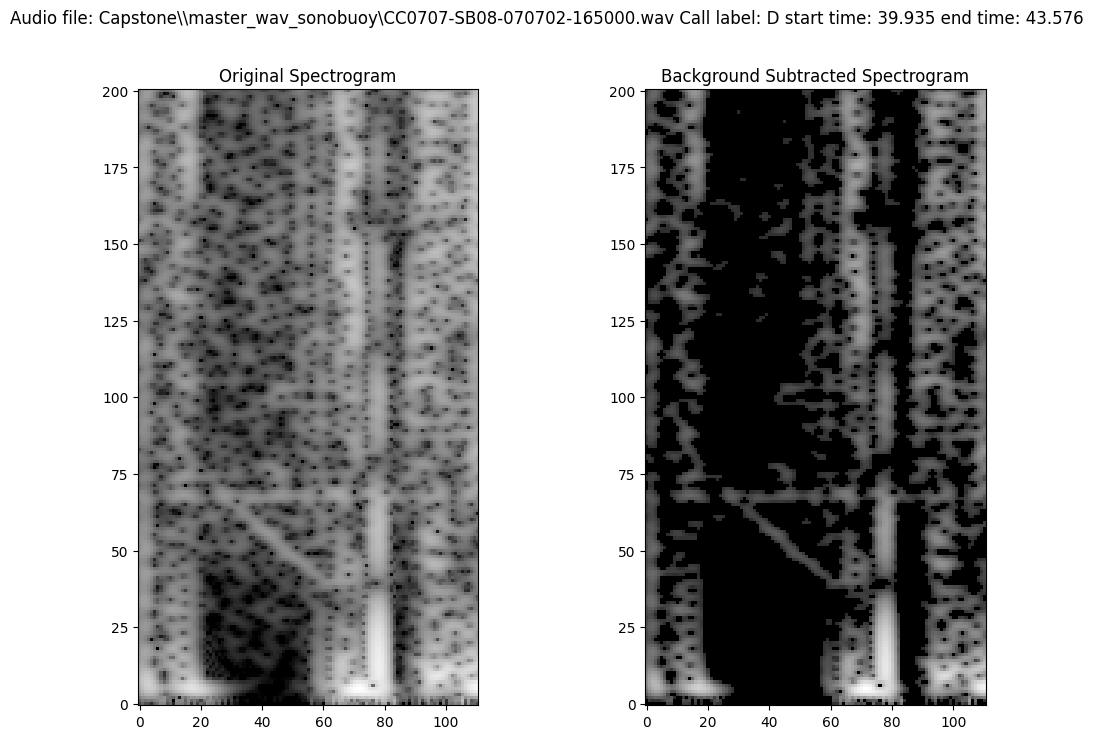

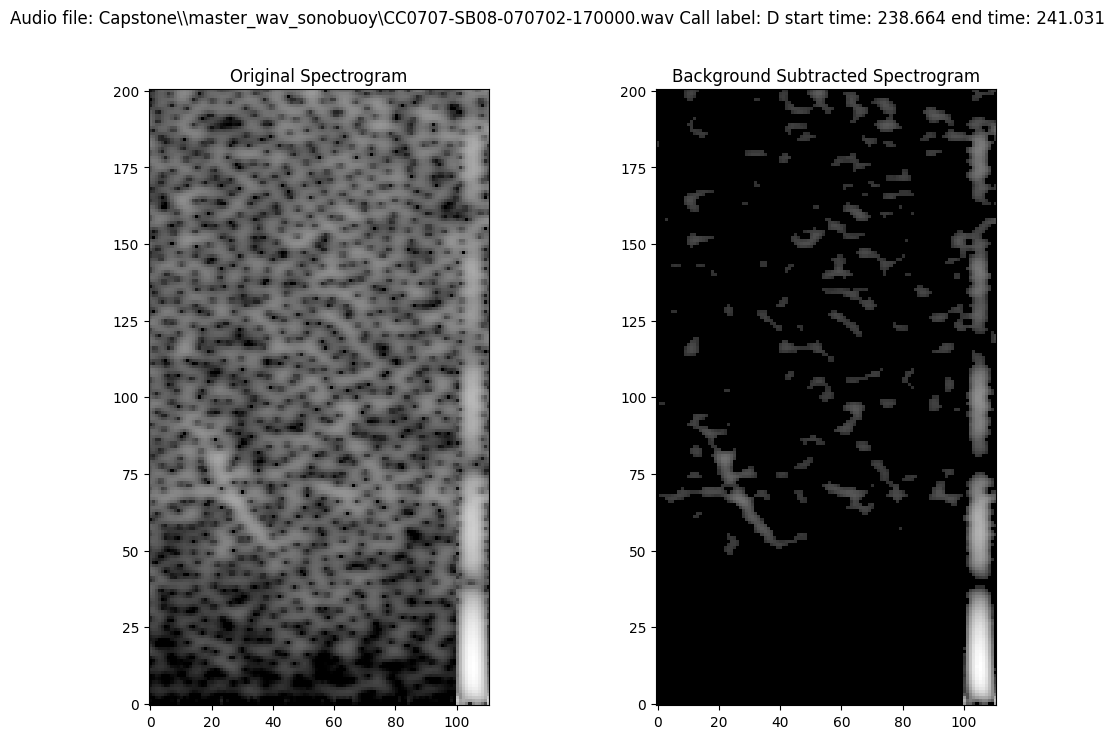

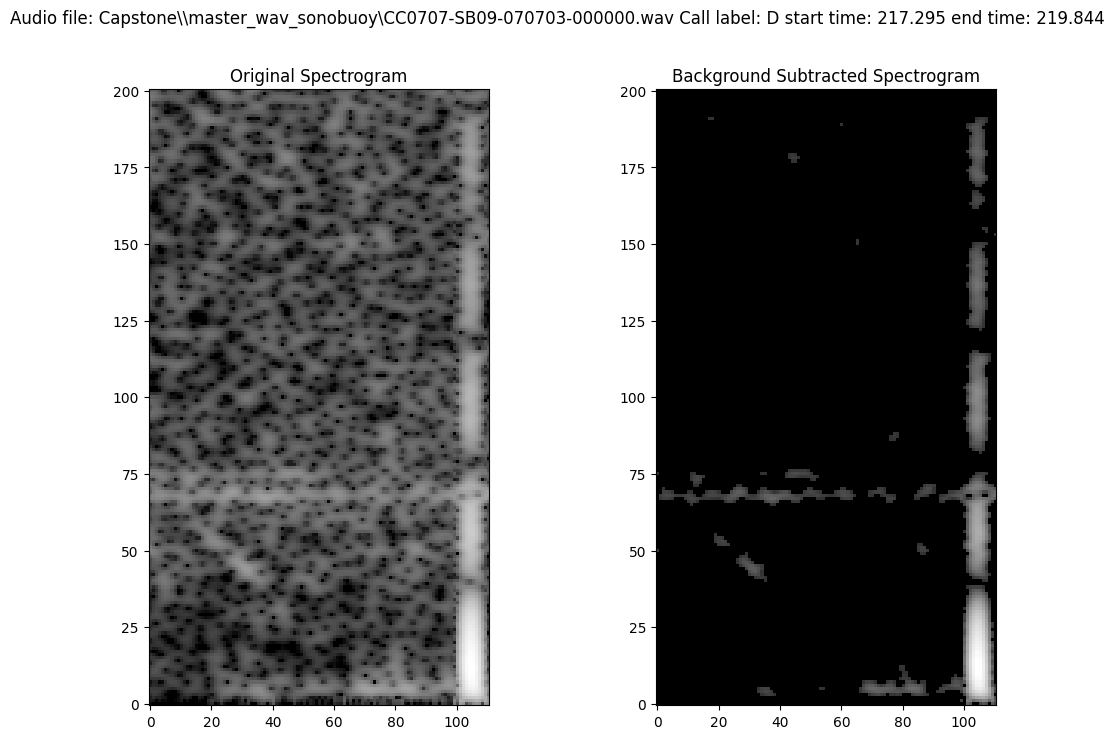

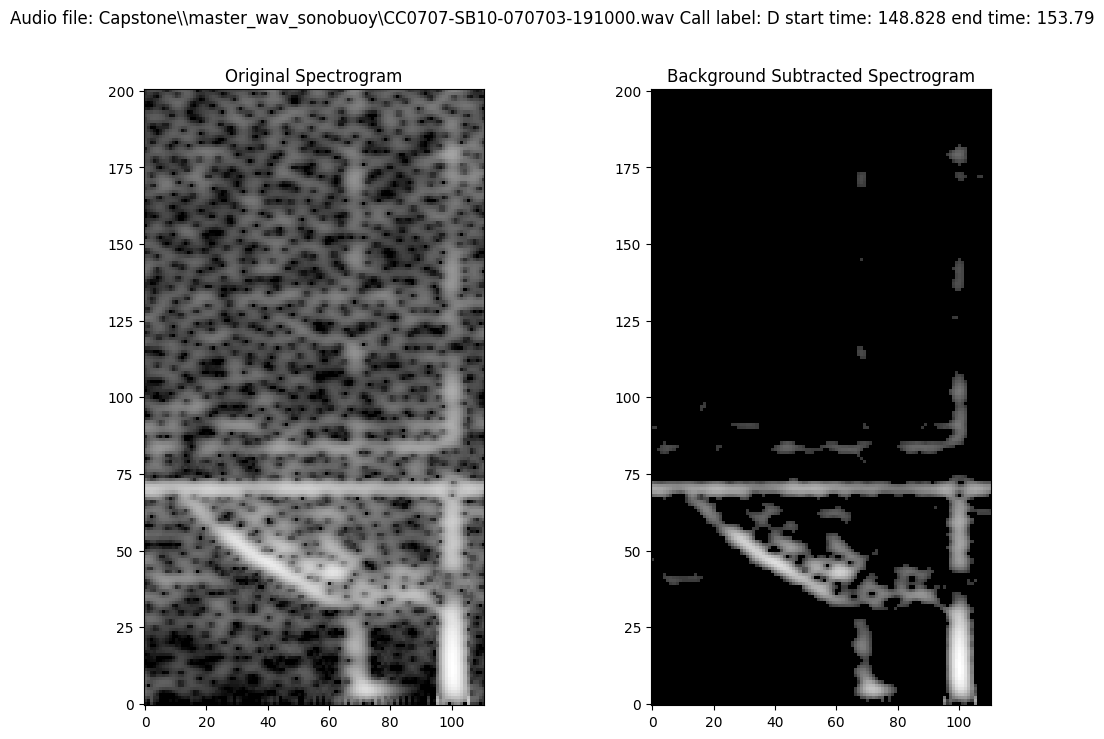

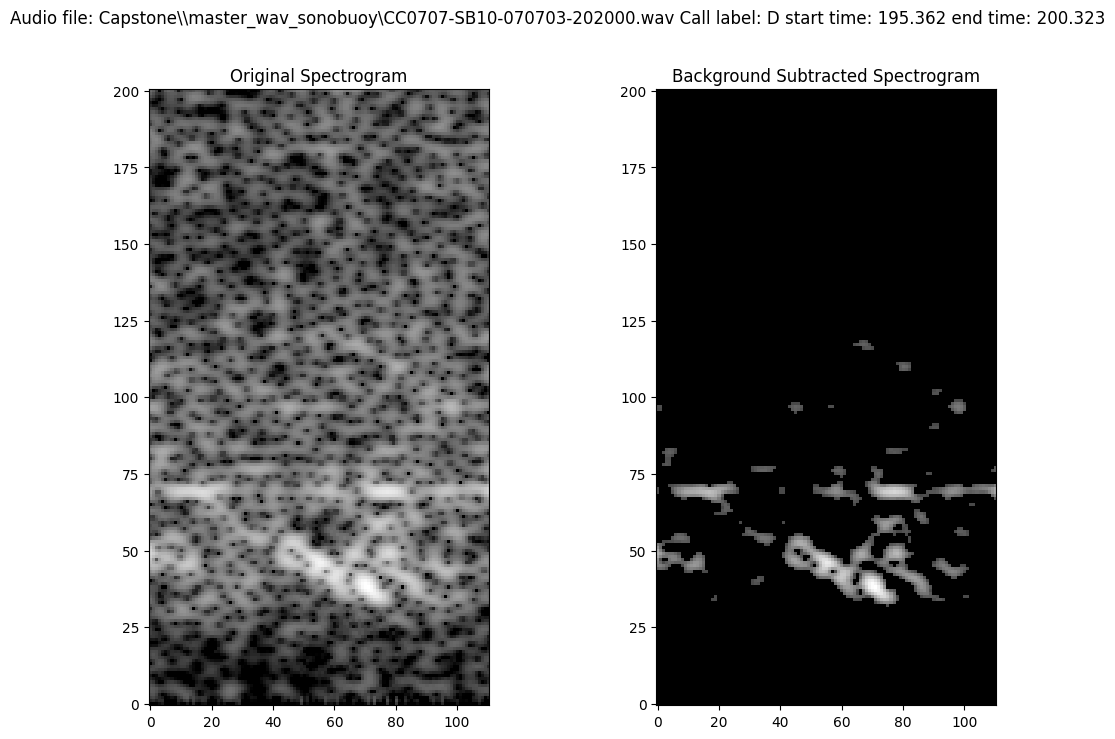

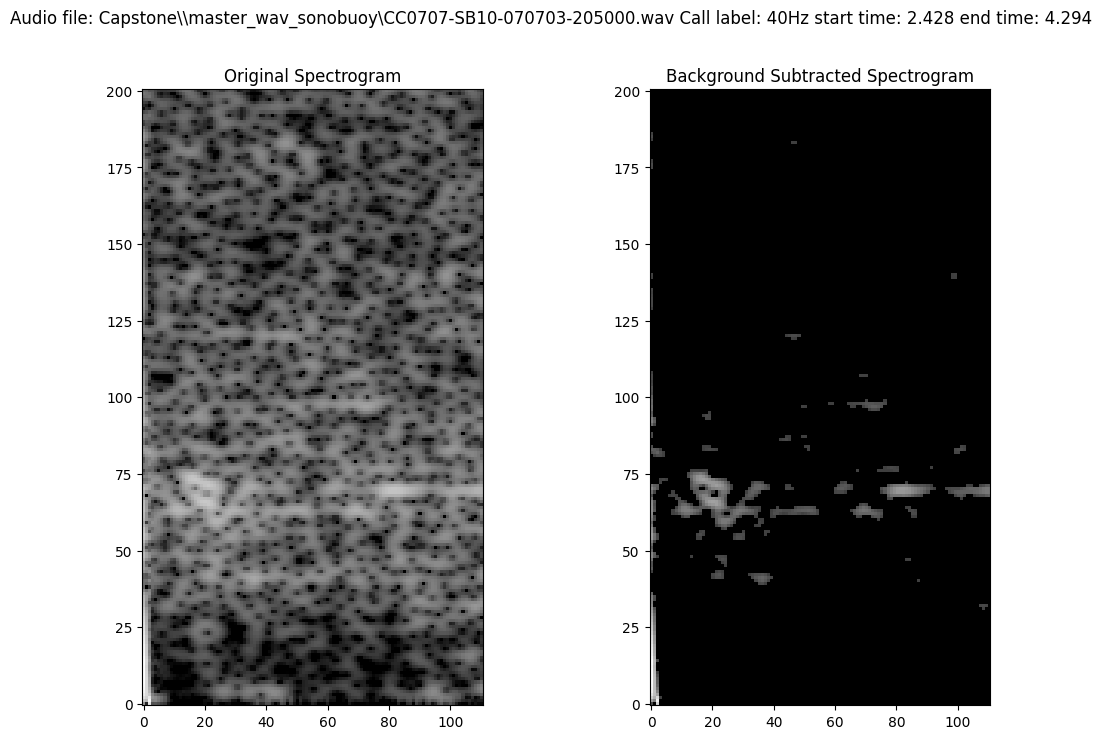

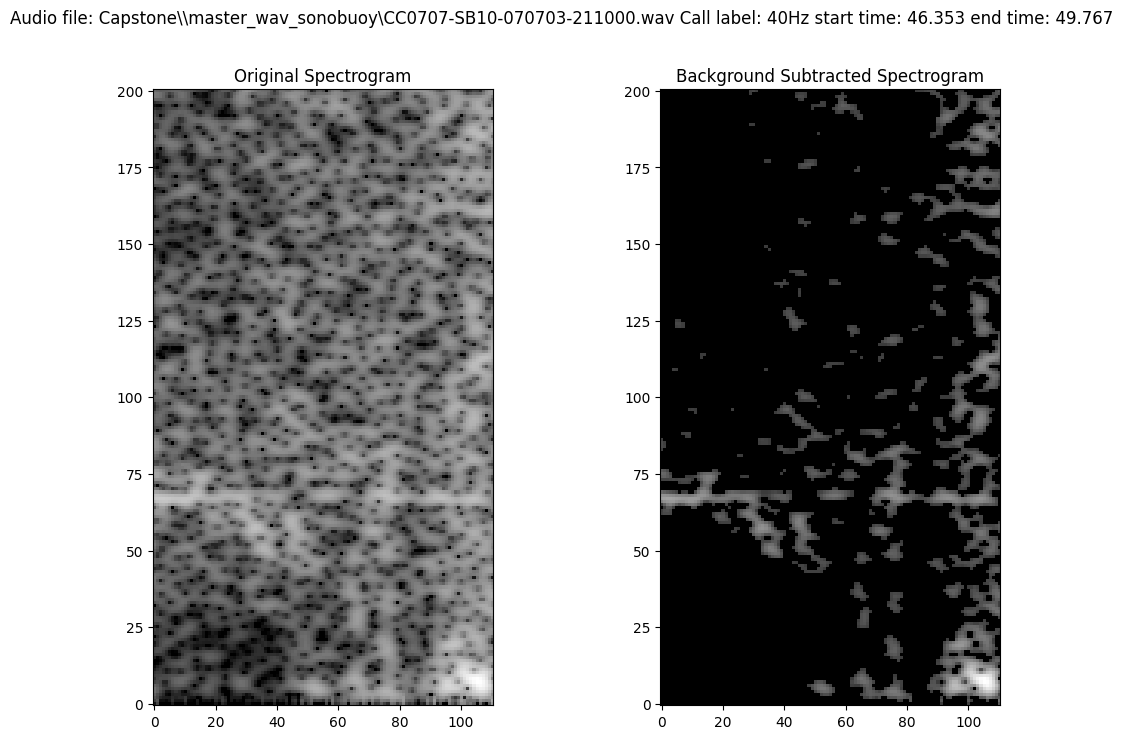

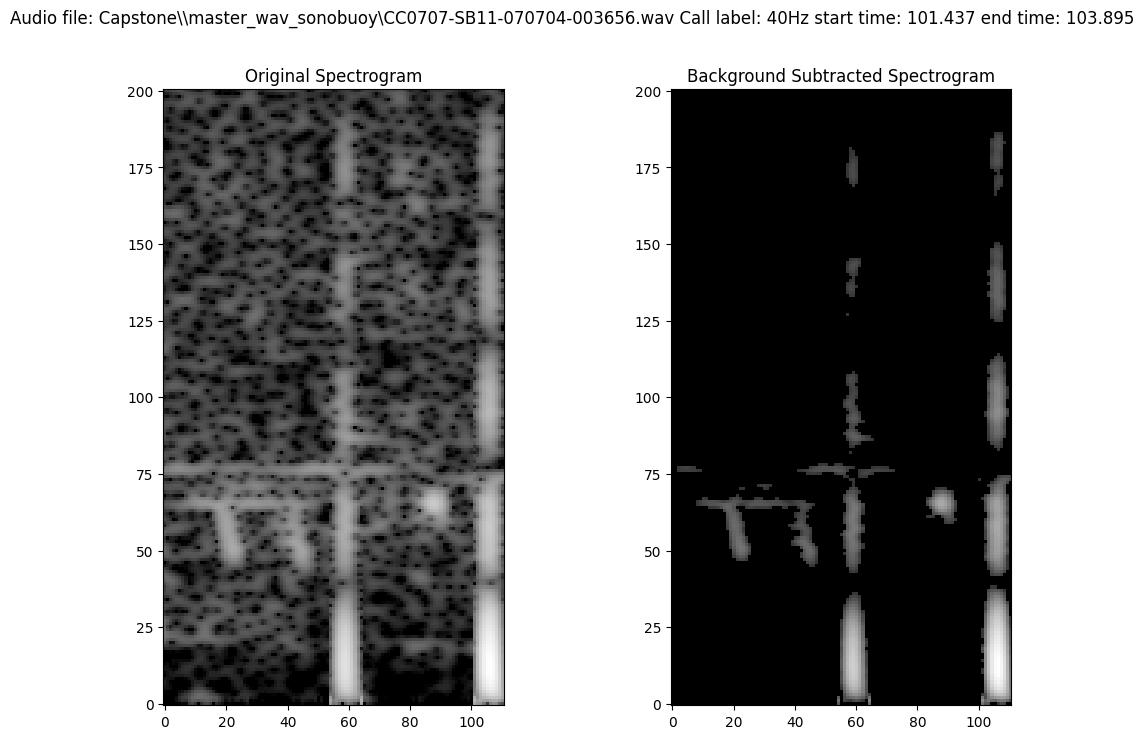

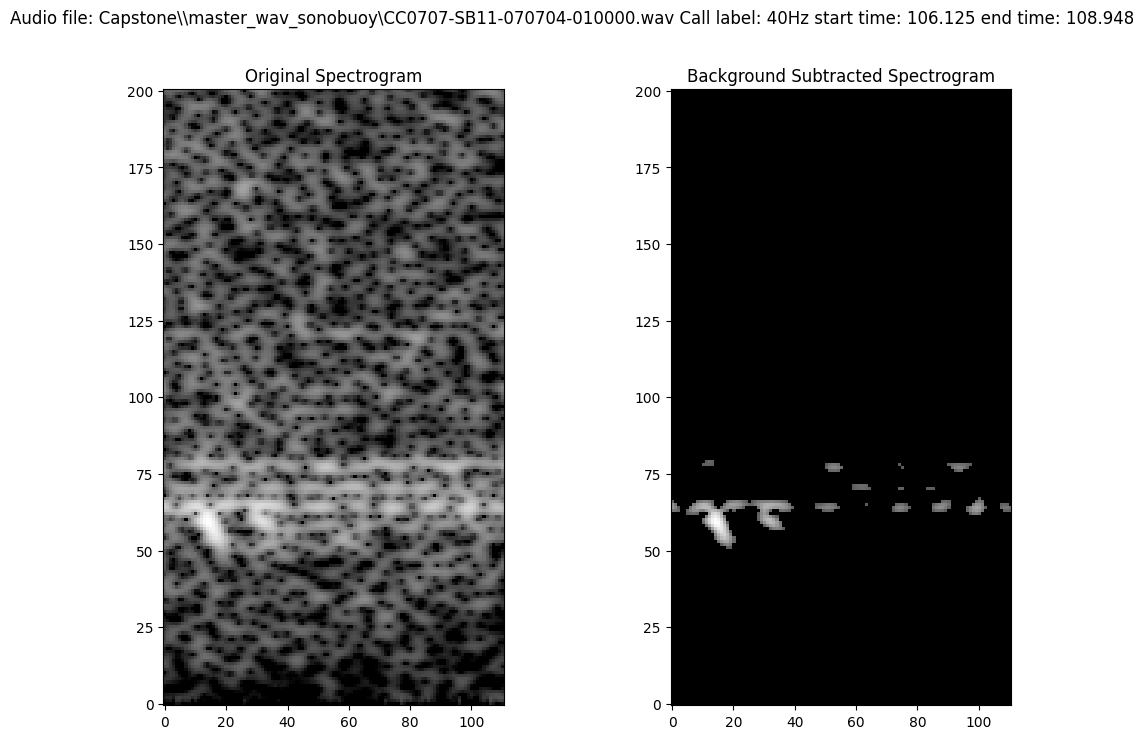

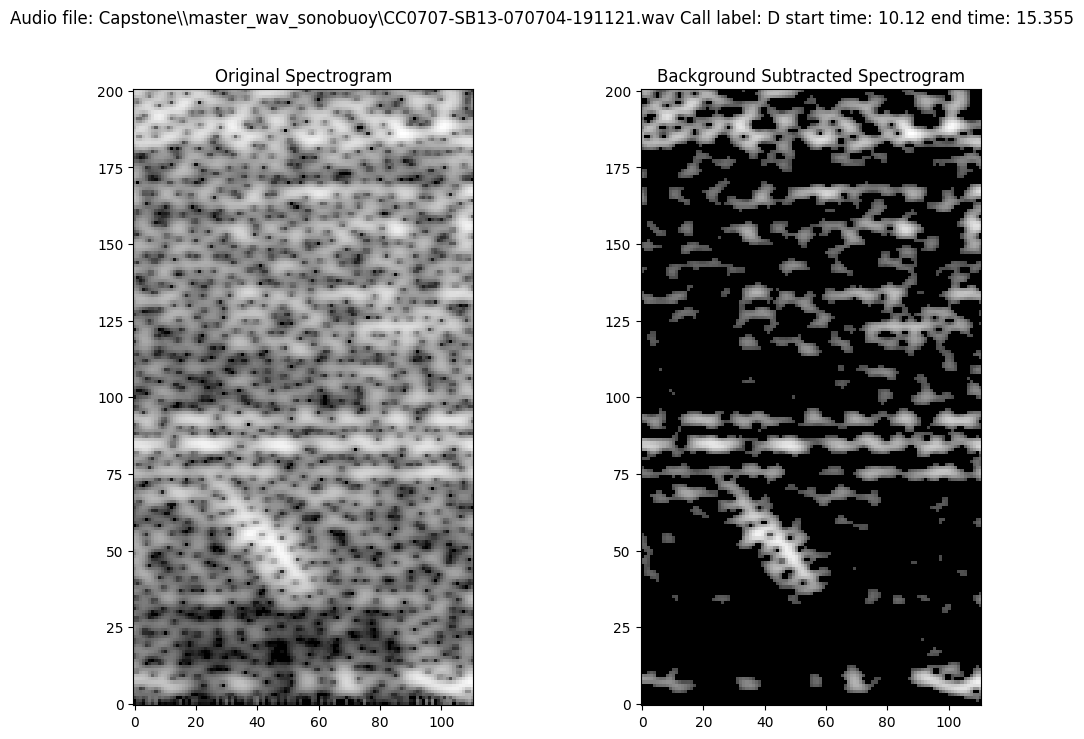

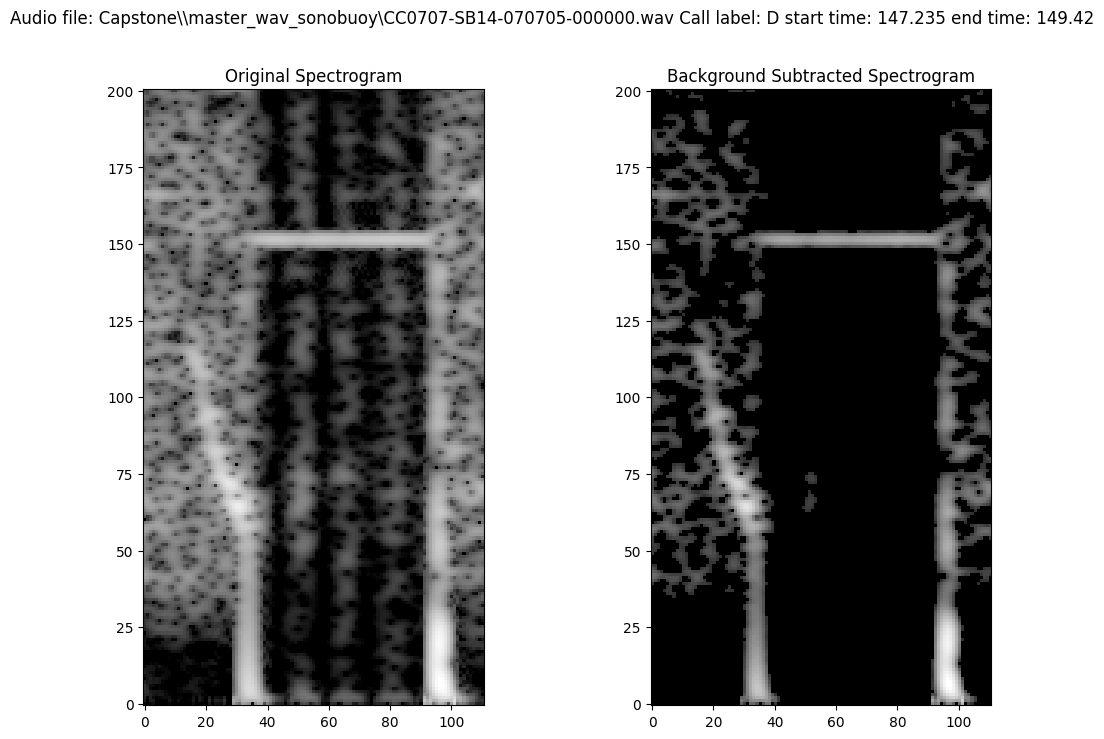

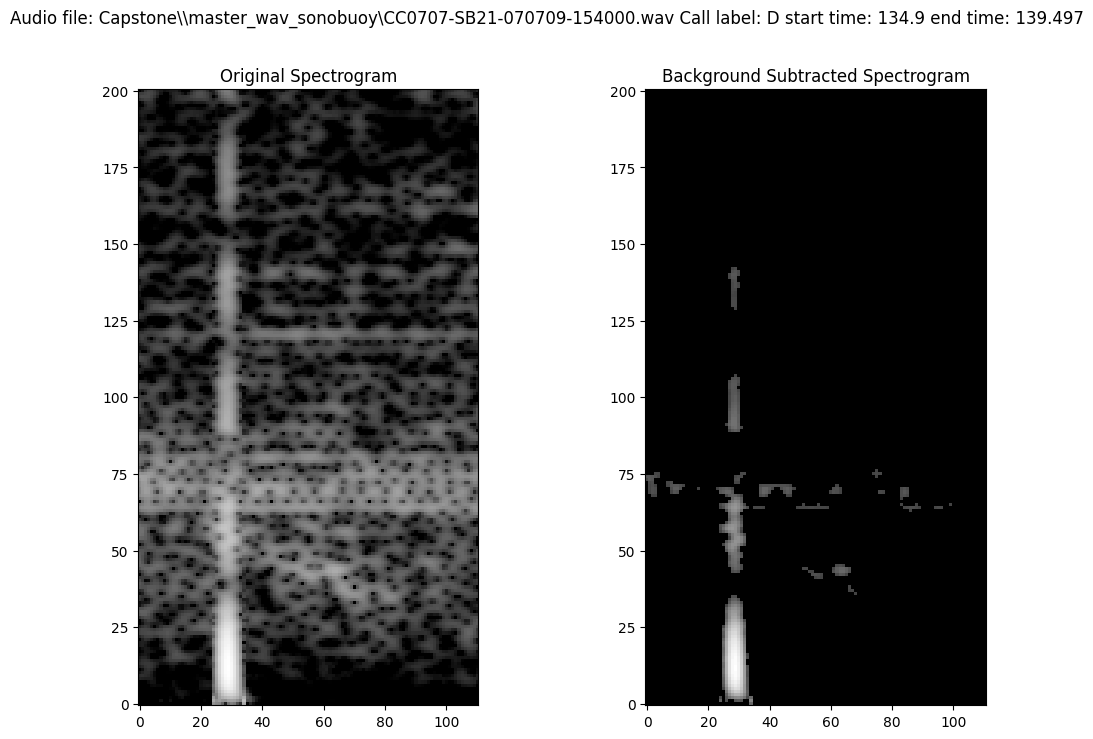

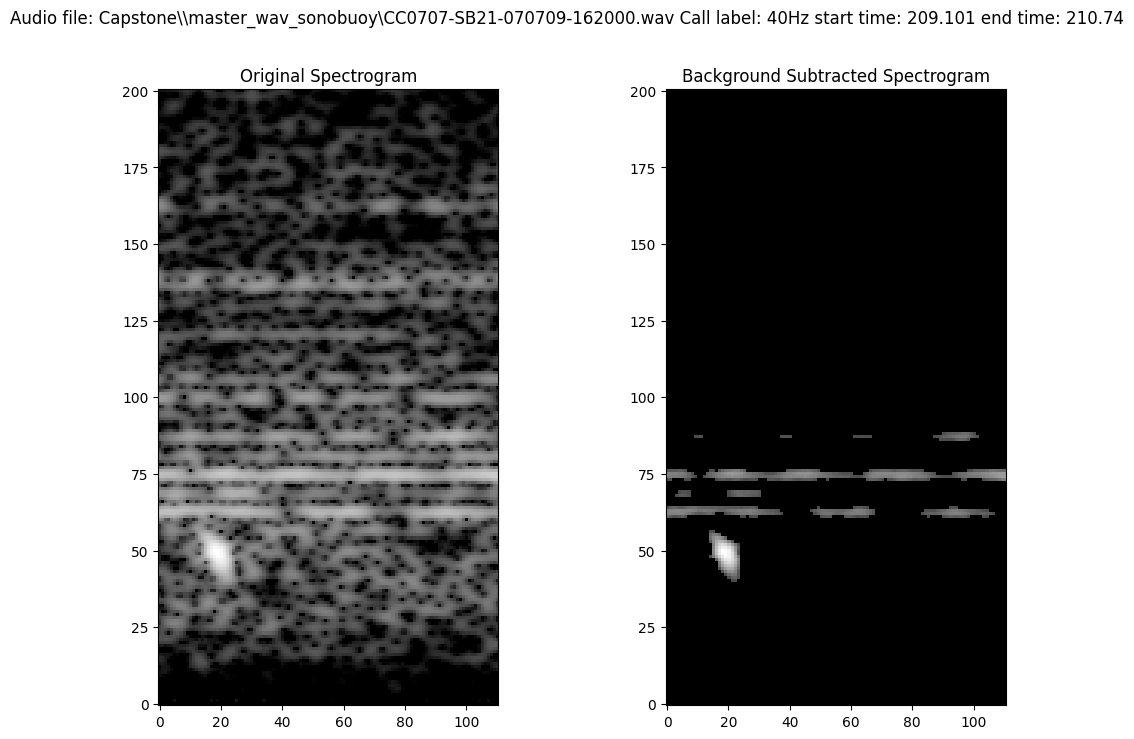

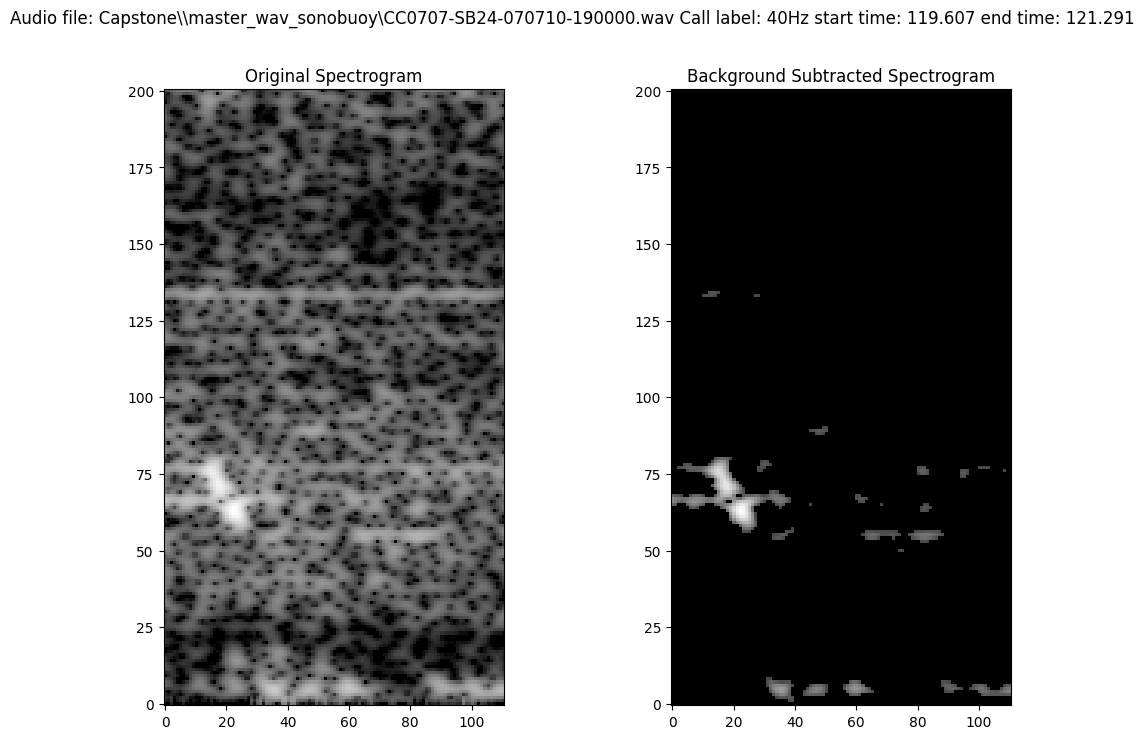

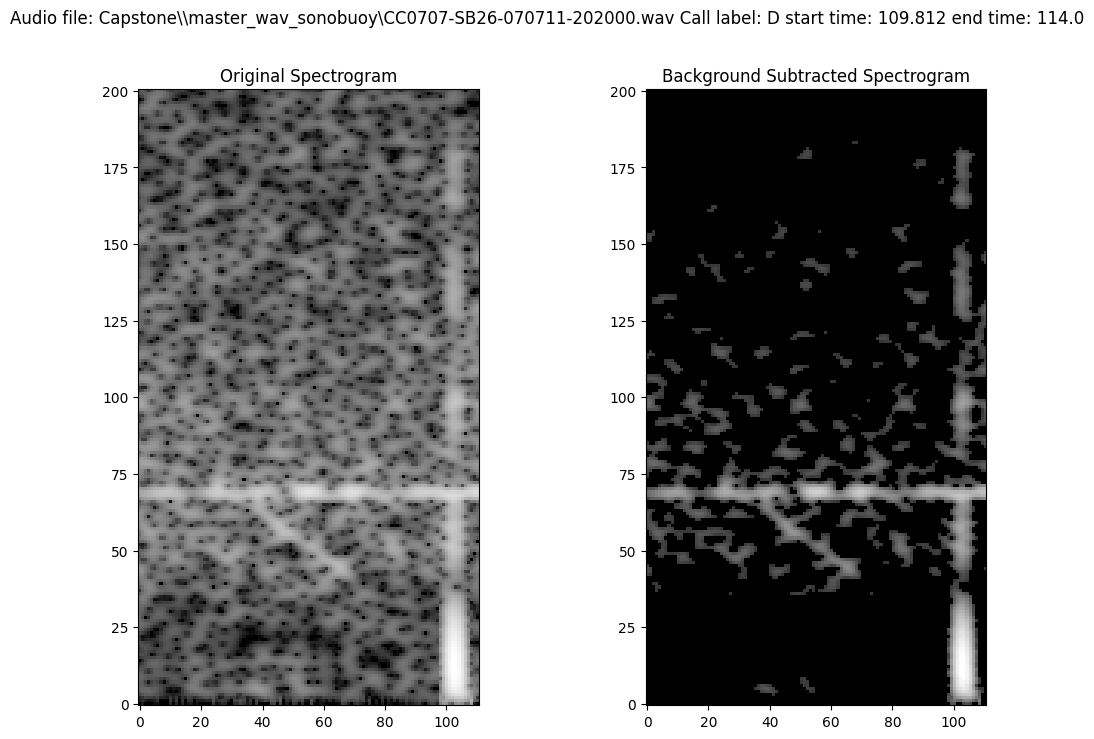

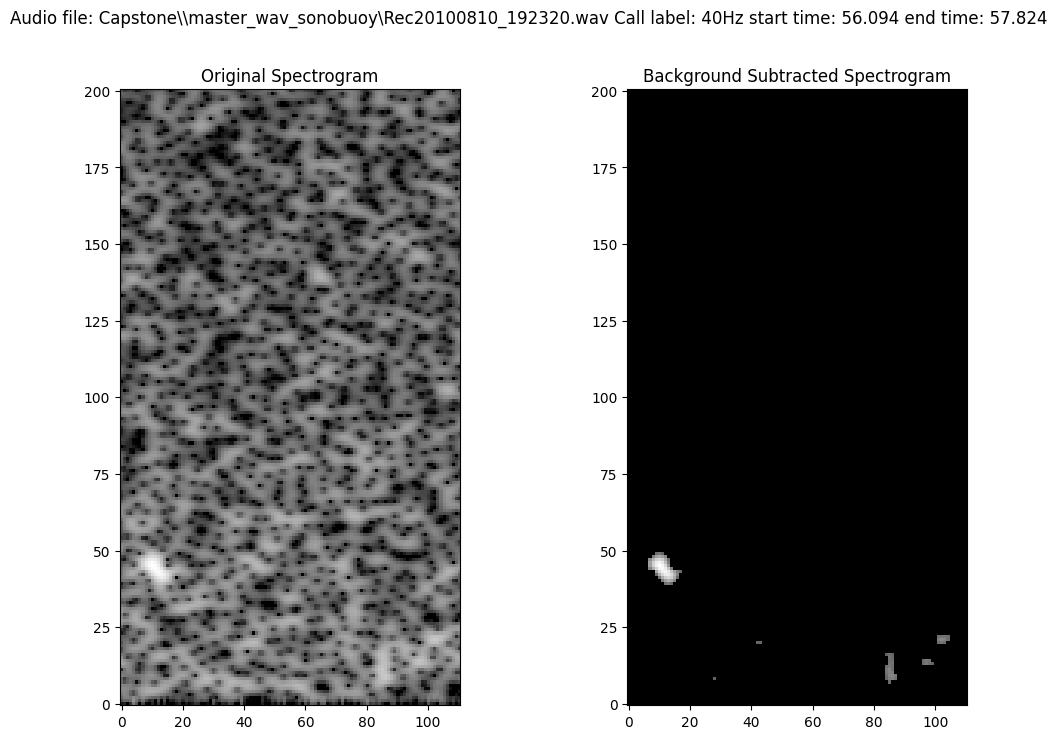

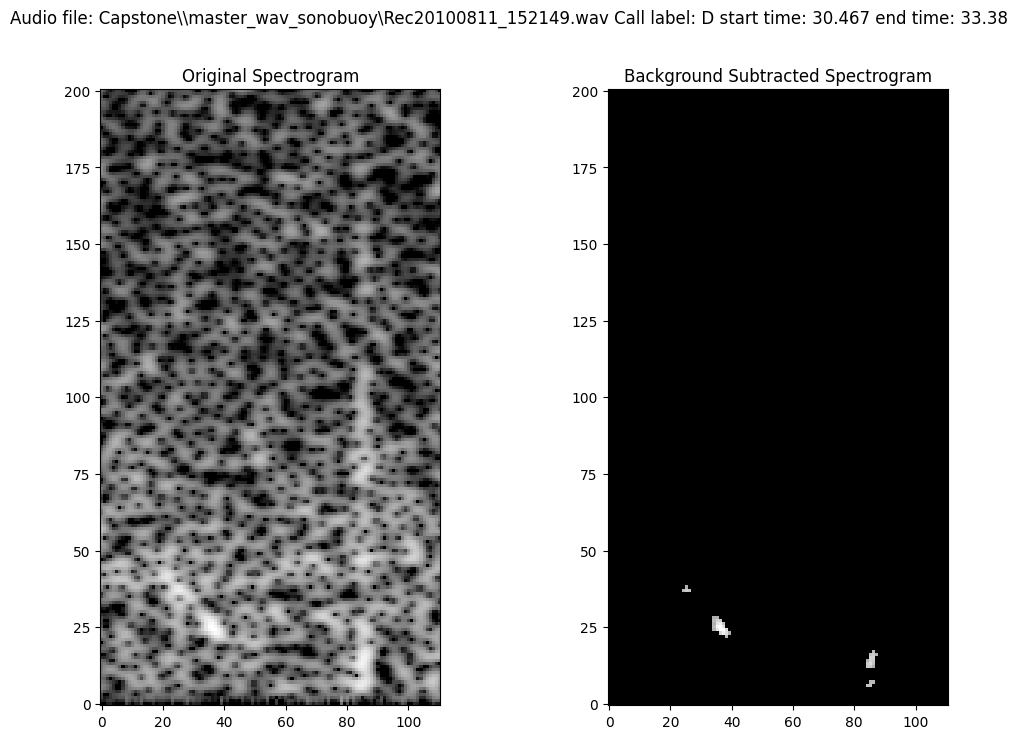

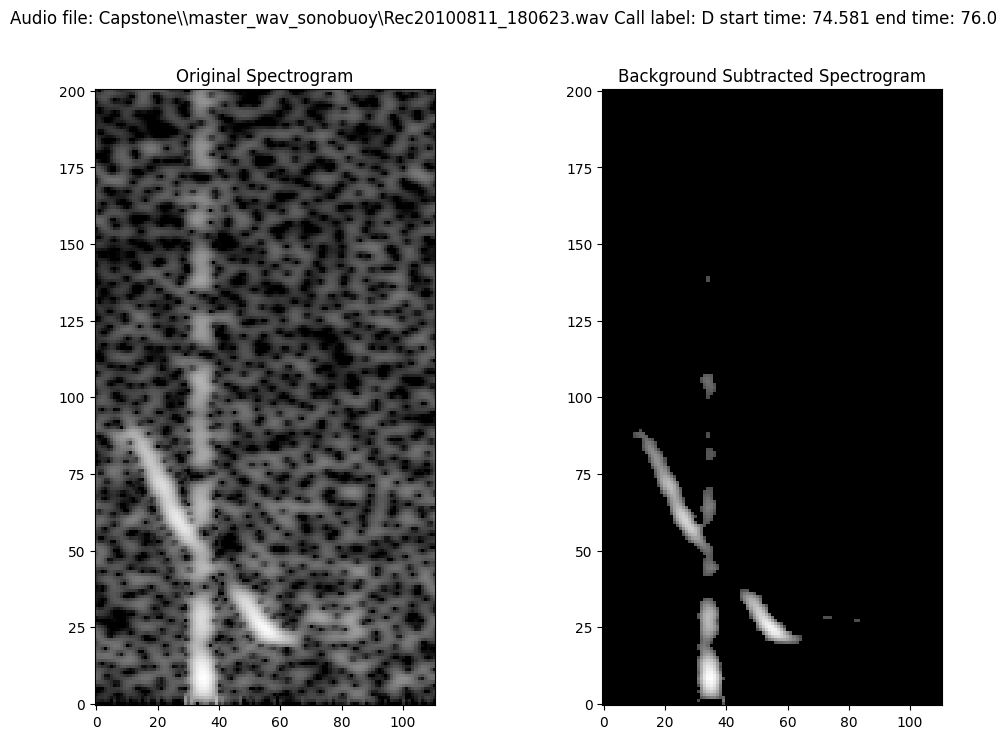

In [45]:

for index, row in CC_2004_07.iterrows():
    # audio file name
    audio_file_name = CC_2004_07['audio_file'][index]
    start_time = CC_2004_07['start_time'][index]

    # collecting audio
    audio = opensoundscape.Audio.from_file(audio_file_name, sample_rate=48000, offset=start_time, duration=6)

    if audio.samples.shape[0] > 0:  # Assuming audio.samples returns a numpy array of audio samples
        spec = opensoundscape.Spectrogram.from_audio(audio, window_type='hamming', window_samples=24000, 
                                                        overlap_samples=21600, fft_size=48000, 
                                                        scaling='density')

    # Storing the image as a 2D array
    spec_image = spec.bandpass(0, 200).to_image()
    spec_image_arr = np.array(spec_image).astype(float)

    # Apply wavelet denoising
    denoised_spec_image_arr = np.zeros_like(spec_image_arr)
    for i in range(spec_image_arr.shape[1]):
        # Apply wavelet denoising to each column of the spectrogram
        denoised_column = pywt.threshold(spec_image_arr[:, i], value=60, mode='soft')
        denoised_spec_image_arr[:, i] = denoised_column

    # Apply threshold to filter out parts of the background
    denoised_spec_image_arr[denoised_spec_image_arr < 20] = 0

    # Plot the original and transformed spectrograms side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))

    # Plot original spectrogram
    axes[0].imshow(np.flipud(spec_image_arr), cmap='gray', origin='lower')
    axes[0].set_title('Original Spectrogram')

    # Plot transformed spectrogram
    axes[1].imshow(np.flipud(denoised_spec_image_arr), cmap='gray', origin='lower')
    axes[1].set_title('Background Subtracted Spectrogram')

    plt.suptitle(f'Audio file: {audio_file_name} Call label: {row["annotation"]} start time: {row["start_time"]} end time: {row["end_time"]}')
    plt.show()